# Pendahuluan
Situs Web Crankshaft List adalah situs web perusahaan yang memiliki ratusan iklan kendaraan gratis. Situs web ini menayangkan berbagai macam iklan kendaraan setiap harinya. Untuk itu dengan mempelajari data yang telah dikumpulkan selama beberapa tahun terakhir dapat digunakan sebagai bahan analisis untuk keperluan keperluan tertentu bagi perusahaan di masa yang akan datang. 

# **Tujuan**
Laporan ini dibuat bertujuan untuk mempelajari data data yang sudah ada dalam beberapa tahun kebelakang untuk mengetahui seberapa besar faktor-faktor lain terhadap harga dari sebuah kendaraan. Tujuan lainnya adalah untuk mempelajari data secara keseluruhan dan menemukan apa saja insight yang bisa diambil dari data tersebut agar dapat dipakai di masa yang akan datang atau dapat menjadi pedoman penjual dalam menaruh harga mobil yang mereka iklan kan.

# Tahapan

Ada beberapa tahapan dalam melakukan analisis data ini, diantaranya:
* Langkah 1. Eksplorasi Data 
* Langkah 2. Pra-pemrosesan data
* Langkah 3. Memperbaiki Kualitas Data
* Langkah 4. Analisis Data Eksploratif 
* Langkah 5. Kesimpulan Umum


# Tahap - 1. Ekspolasi Data

## Memuat Library

Memuat semua library yang dibutuhkan pada laporan ini.

In [1]:
# Muat semua library
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns


## Memuat Data

Memuat data yang disimpan pada file path berikut: /datasets/vehicles_us.csv

In [2]:
# Muat file data menjadi DataFrame
path = '/datasets/vehicles_us.csv'
df = pd.read_csv(path)
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


## Mengeksplorasi Data Awal

Dataset berisi kolom-kolom berikut:

- `price` — harga kendaraan
- `model_year` — model tahun kendaraan
- `model` — model kendaraan
- `condition` — kondisi kendaraan
- `cylinders` — silinder yang digunakan pada kendaraan
- `fuel` — gas, disel, dan lain-lain
- `odometer` — jarak tempuh kendaraan saat iklan ditayangkan  
- `transmission` — transmisi yang digunakan di kendaraan
- `paint_color` — warna kendaraan
- `is_4wd` — apakah kendaraan memiliki penggerak 4 roda (tipe Boolean)
- `date_posted` — tanggal iklan ditayangkan
- `days_listed` — jumlah hari iklan ditayangkan hingga dihapus


In [3]:
# tampilkan informasi/rangkuman umum tentang DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
df.shape

(51525, 13)

Dari data info yang ditampilkan:
1. Terdapat 51525 entries data ataupun baris dalam dataset
2. Terdapat 13 kolom dalam dataset
3. Terdapat beberapa kolom yang memiliki missing value

Missing value berada di beberapa kolom, mari explorasi lebih dalam tentang missing value 

In [5]:
# tampilkan sampel data
df.sample(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
32218,5000,2008.0,honda odyssey,good,6.0,gas,117847.0,automatic,mini-van,blue,NaN,2018-05-26,67
35356,9988,2014.0,chevrolet cruze,good,4.0,gas,75716.0,automatic,sedan,NaN,NaN,2018-07-06,17
41775,14900,2016.0,ford mustang,excellent,4.0,gas,86117.0,automatic,coupe,red,NaN,2018-12-29,6
33176,26700,2017.0,ford mustang gt coupe 2d,good,8.0,gas,26192.0,other,coupe,black,NaN,2019-02-19,35
39269,16995,2010.0,chevrolet silverado 2500hd,excellent,8.0,gas,104750.0,automatic,truck,blue,1.0,2018-09-09,19
4342,5950,2000.0,jeep cherokee,good,6.0,gas,NaN,automatic,offroad,white,1.0,2019-04-05,51
40441,6900,2008.0,chevrolet impala,excellent,6.0,gas,71493.0,automatic,sedan,NaN,NaN,2018-05-09,28
16030,21988,2018.0,ram 1500,good,6.0,gas,18185.0,automatic,truck,blue,1.0,2018-10-10,9
15440,5800,NaN,jeep grand cherokee,good,8.0,gas,160139.0,automatic,SUV,NaN,1.0,2018-12-20,10
17130,12480,2012.0,dodge charger,excellent,8.0,gas,NaN,automatic,sedan,red,NaN,2019-02-11,37


In [6]:
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

Terdapat missing value di 5 kolom yang berbeda, yaitu:
1. `model_year`
2. `cylinders`
3. `odometer`
4. `paint_color`
5. `is_4wd`

Mari periksa tipe data di setiap kolom yang ada

In [7]:
df.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

Terdapat beberapa kolom yang memiliki tipe data yang tida sesuai, yaitu:
1. `model_year` tipe data: float64
2. `cylinders` tipe data: float64
3. `odometer` tipe data: float64
4. `date_posted` tipe data: object

## Kesimpulan dan Langkah-Langkah Selanjutnya
Dari langkah yang sudah dilakukan, terdapat missing value di 5 kolom yang berbeda, yaitu: `model_year`, `cylinders`, `odometer`, `paint_color`, `is_4wd` dan terdapat beberapa kolom yang memiliki tipe data yang tida sesuai, tipe data tersebut dapat dirubah dengan format sebagai berikut: 
1. `model_year` tipe data: float64 -> datetime
2. `cylinders` tipe data: float64 -> int
3. `odometer` tipe data: float64 -> int
4. `date_posted` tipe data: object -> datetime

Langkah selanjutnya adalah mengatasi nilai yang hilang pada kolom kolom tersebut dan merubah beberapa tipe data di kolom yang bermasalah tersebut sesuai format yang diatas. 

# Tahap - 2. Pra-pemrosesan

## Mengatasi Nilai-Nilai yang Hilang 

Dari langkah sebelumnya, terlihat bahwa ada 5 kolom dengan nilai yang hilang. Mari explorasi lebih dalam missing value tersebut dan mengetahui nilai persentase dari missing value di setiap kolom

In [8]:
report_table = df.isna().sum().to_frame()
report_table = report_table.rename(columns={0: 'missing_values'})
report_table['% of total'] = ((report_table['missing_values'] / len(df)) * 100).round(2)
report_table.sort_values(by='missing_values', ascending=False)

,missing_values,% of total
is_4wd,25953,50.37
paint_color,9267,17.99
odometer,7892,15.32
cylinders,5260,10.21
model_year,3619,7.02
price,0,0.00
model,0,0.00
condition,0,0.00
fuel,0,0.00
transmission,0,0.00


**Kesimpulan** 

Dari tabel yang ditampilkan diatas, terlihat bahwa terdapat missing value di 5 kolom yang berbeda dengan jumlah yang cukup besar. Persentase terbesar missing value berada di kolom `is_4wd` dengan nilai persentase yaiut 50% data, hampir setengah dari data dikolom ini adalah missing value. Untuk nilai persentase yang paling rendah berada di kolom `model_year` dengan nilai persentase yaitu 7% data. Mari atasi missing value tersebut dimulai dari yang paling besar persentasenya.

### Mengatasi Missing Value 1

Setelah di urutkan dalam bentuk persentase, ternyata missing value pada kolom `is_4wd` memiliki nilai yang sangat tinggi diikuti dengan kolom `paint_color`, `odometer`, `cylinders`, `model_year` yang memiliki nilai yang beragam. Sesuai dengan urutan diatas, mari coba atasi satu persatu, dimulai dengan kolom `is_4wd` terlebih dahulu. 

In [9]:
df['is_4wd'].value_counts()

1.0    25572
Name: is_4wd, dtype: int64

Kolom ini adalah kolom yang memiliki nilai Boolean, yaitu kolom ini hanya berisi nilai True atau False saja. Nilai 1 menandakan True dan 0 menandakan False.

Terlihat dari hasil diatas hanya terdapat nilai 1 dengan 25572, itu artinya nilai True sudah terisi semua, dan yang belum hanya nilai 0 atau False. Itu berarti nilai yang hilang adalah nilai 0 atau False. Maka dari itu, missing value tersebut berisi nilai False

In [10]:
df['is_4wd'] = df['is_4wd'].fillna(0)

In [11]:
df['is_4wd'].value_counts()

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

Pengecekan kembali apakah missing value pada kolom ini sudah terisi atau belum

In [12]:
df.isna().sum().sort_values(ascending=False) / len(df) * 100

paint_color     17.985444
odometer        15.316836
cylinders       10.208637
model_year       7.023775
price            0.000000
model            0.000000
condition        0.000000
fuel             0.000000
transmission     0.000000
type             0.000000
is_4wd           0.000000
date_posted      0.000000
days_listed      0.000000
dtype: float64

### Mengatasi Missing Value 2

Kolom `is_4wd` sudah 0, berarti missing value pada kolom ini sudah terisi. Lanjut untuk mengatasi missing value pada kolom selanjutnya.

In [13]:
df['paint_color'].value_counts()

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

Kolom `paint_color` adalah kolom warna dari kendaraan dan warna nya pun beragam. Untuk itu kolom ini belum bisa dipastikan apakah missing value bisa diisi dengan warna kendaraan yang ada diatas. Oleh karena itu missing value pada kolom ini untuk sementara diisi dulu dengan 'unknown' / tidak diketahui.  

In [14]:
df['paint_color'] = df['paint_color'].fillna('unknown')

In [15]:
df['paint_color'].value_counts()

white      10029
unknown     9267
black       7692
silver      6244
grey        5037
blue        4475
red         4421
green       1396
brown       1223
custom      1153
yellow       255
orange       231
purple       102
Name: paint_color, dtype: int64

Periksa kembali apakah missing value sudah terisi atau belum

In [16]:
df.isna().sum().sort_values(ascending=False) / len(df) * 100

odometer        15.316836
cylinders       10.208637
model_year       7.023775
price            0.000000
model            0.000000
condition        0.000000
fuel             0.000000
transmission     0.000000
type             0.000000
paint_color      0.000000
is_4wd           0.000000
date_posted      0.000000
days_listed      0.000000
dtype: float64

Nilai 'unknown' sudah terisi dengan 9267 dan persentase missing value pada kolom `paint_color` sudah 0, itu berarti missing value pada kolom ini sudah berhasil teratasi.

### Mengatasi Missing Value 3

Untuk langkah berikutnya, terlihat bahwa kolom `odometer`, `cylinders` dan `model_year` masih memiliki nilai yang hilang. Mari mulai dengan kolom `odometer` terlebih dahulu, apa saja yang bisa terlihat dari kolom ini. 

In [17]:
df['odometer'].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

In [18]:
df['odometer'].value_counts()

0.0         185
140000.0    183
120000.0    179
130000.0    178
160000.0    167
           ... 
280499.0      1
49814.0       1
194920.0      1
140800.0      1
269527.0      1
Name: odometer, Length: 17762, dtype: int64

Dari data yang ditampilkan, kolom ini memiliki nilai yang sangat beragam, mengingat kolom ini adalah kolom dengan nilai jarak tempuh kendaraan. Oleh karena itu mari bandingkan kolom ini dengan kolom kondisi kendaraan atau kolom `condition` dan cari nilai dari median dan mean nya. Sebelum itu mari simpan nilai tanpa missing value kolom `odometer` ke variabel nomiss_odo.  

In [19]:
nomiss_odo = df.loc[~df['odometer'].isna()]
nomiss_odo

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51518,3750,2005.0,ford taurus,excellent,6.0,gas,110200.0,automatic,sedan,silver,0.0,2018-08-10,63
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32


In [20]:
nomiss_odo.groupby('condition')['odometer'].mean().reset_index()

,condition,odometer
0,excellent,106687.682258
1,fair,183062.233577
2,good,129919.930980
3,like new,79426.738166
4,new,43476.056000
5,salvage,140919.989796


In [21]:
nomiss_odo.groupby('condition')['odometer'].median().reset_index()

,condition,odometer
0,excellent,104230.0
1,fair,181613.0
2,good,129000.0
3,like new,72982.5
4,new,8002.0
5,salvage,142673.5


<AxesSubplot:>

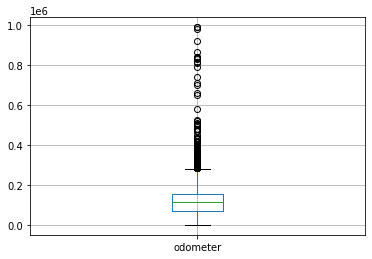

In [22]:
nomiss_odo.boxplot('odometer')

Terlihat bahwa pada kolom ini nilai median dan mean memiliki nilai yang cukup jauh berbeda. Boxplot pada kolom ini pun menampilkan nilai dengan outlier yang cukup banyak. Oleh karena itu, untuk mengisi missing value pada kolom ini sebaiknya menggunakan median sebagai parameternya, mengingat nilai outlier yang cukup banyak, pemilihan nilai median menurut saya cukup aman.  

In [23]:
median_odo = pd.pivot_table(data=df, columns='condition', values='odometer', aggfunc='median')
median_odo

condition,excellent,fair,good,like new,new,salvage
odometer,104230.0,181613.0,129000.0,72982.5,8002.0,142673.5


In [24]:
median_odo['excellent'][0]

104230.0

In [25]:
# Metode untuk memasukan median ke dalam missing value `odometer`
df.loc[(df['condition']=='excellent') & (df['odometer'].isna()), 'odometer'] = median_odo['excellent'][0]

In [26]:
# lopping metode untuk semua category
for column in median_odo.columns:
    df.loc[(df['condition']==column) & (df['odometer'].isna()), 'odometer'] = median_odo[column][0]

In [27]:
#  Fungsi yang digunakan untuk mengisi missing value
def group_fillna(dataframe, group_col, miss_col):
    median_odo = pd.pivot_table(dataframe, columns=group_col, values=miss_col, aggfunc='median')
    
    for column in median_odo.columns:
        dataframe.loc[(dataframe[group_col]==column) & (dataframe[miss_col].isna()), miss_col] = median_odo[column][0]
    
    return dataframe

In [28]:
# Pemeriksaan kembali nilai di dalam kolom baru
df = group_fillna(dataframe=df, group_col='condition', miss_col='odometer')
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,unknown,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28


In [29]:
df.isna().sum().sort_values(ascending=False) / len(df) * 100

cylinders       10.208637
model_year       7.023775
price            0.000000
model            0.000000
condition        0.000000
fuel             0.000000
odometer         0.000000
transmission     0.000000
type             0.000000
paint_color      0.000000
is_4wd           0.000000
date_posted      0.000000
days_listed      0.000000
dtype: float64

### Mengatasi Missing Value 4

Dari data yang dihasilkan diatas, kolom `odometer` sudah memiliki nilai 0, itu artinya kolom ini sudah tidak memiliki missing value, dengan kata lain missing value di kolom ini sudah diatasi.
Mari lanjut ke kolom selanjutnya yang masih memiliki missing value. Terlihat missing value yang tersisa berada di kolom `cylinders` dan `model_year`.
Mari atasi kolom `cylinders` terlebih dahulu dengan menampilkan kolom tersebut dan cari tau apa saja yang bisa didapat pada kolom ini. 

In [30]:
df['cylinders'].describe()

count    46265.000000
mean         6.125235
std          1.660360
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

In [31]:
df['cylinders'].value_counts()

8.0     15844
6.0     15700
4.0     13864
10.0      549
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64

Kolom ini berisi nilai kategorik dari silinder suatu kendaraan. Silinder kendaraan biasanya tergantung dari model kendaraan tersebut, karena setiap model memiliki silinder yang berbeda beda.
Untuk itu, missing value pada kolom `cylinders` akan menggunakan kolom `model` sebagai parametr untuk mengisi missing valuenya. Mari kelompokan setiap model berdasarkan silindernya.

In [32]:
nomiss_cyl = df.loc[~df['cylinders'].isna()]
nomiss_cyl

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,unknown,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71


In [33]:
nomiss_cyl.groupby('model')['cylinders'].mean().reset_index()

,model,cylinders
0,acura tl,5.971564
1,bmw x5,6.406375
2,buick enclave,6.000000
3,cadillac escalade,7.986395
4,chevrolet camaro,6.887097
...,...,...
95,toyota sienna,5.952381
96,toyota tacoma,5.345205
97,toyota tundra,7.919561
98,volkswagen jetta,4.281116


In [34]:
nomiss_cyl.groupby('model')['cylinders'].median().reset_index()

,model,cylinders
0,acura tl,6.0
1,bmw x5,6.0
2,buick enclave,6.0
3,cadillac escalade,8.0
4,chevrolet camaro,6.0
...,...,...
95,toyota sienna,6.0
96,toyota tacoma,6.0
97,toyota tundra,8.0
98,volkswagen jetta,4.0


<AxesSubplot:>

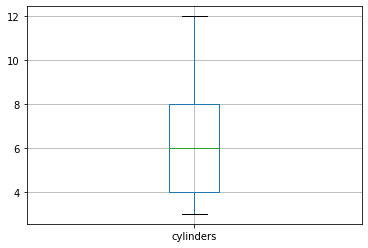

In [35]:
nomiss_cyl.boxplot('cylinders')

Terlihat dari boxplot diatas, nilai yang paling masuk akan untuk mengisi missing value pada kolom `cylinders` adalah nilai median, karena bisa terlihat bahwa nilai median mimiliki nilai bulat sedangkan nilai rata-rata atau mean memiliki nilai decimal. Mengingat bahwa kolom ini adalah kolom silinder kendaraan dimana nilai tersebut tidak mungkin memiliki nilai decimal. Maka dari itu nilai median adalah nilai yang paling cocok untuk mengisi missing value pada kolom ini. 

Mari buat metode dan fungsi untuk memasukan nilai median ke dalam missing value pada kolom ini.

In [36]:
median_cyl = pd.pivot_table(data=df, columns='model', values='cylinders', aggfunc='median')
median_cyl

model,acura tl,bmw x5,buick enclave,cadillac escalade,chevrolet camaro,chevrolet camaro lt coupe 2d,chevrolet colorado,chevrolet corvette,chevrolet cruze,chevrolet equinox,...,toyota camry le,toyota corolla,toyota highlander,toyota prius,toyota rav4,toyota sienna,toyota tacoma,toyota tundra,volkswagen jetta,volkswagen passat
cylinders,6.0,6.0,6.0,8.0,6.0,6.0,5.0,8.0,4.0,4.0,...,4.0,4.0,6.0,4.0,4.0,6.0,6.0,8.0,4.0,4.0


In [37]:
median_cyl['acura tl'][0]

6.0

In [38]:
df.loc[(df['model']=='acura tl') & (df['cylinders'].isna()), 'cylinders'] = median_cyl['acura tl'][0]

In [39]:
for column in median_cyl:
    df.loc[(df['model']==column) & (df['cylinders'].isna()), 'cylinders'] = median_cyl[column][0]
    

In [40]:
def group_fillna(dataframe, col_group, col_miss):
    median_cyl = pd.pivot_table(data=dataframe, columns=col_group, values=col_miss, aggfunc='median')
    
    for column in median_cyl:
        dataframe.loc[(dataframe[col_group]==column) & (dataframe[col_miss].isna()), col_miss] = median_cyl[column][0]
    
    return dataframe

In [41]:
df = group_fillna(dataframe=df, col_group='model', col_miss='cylinders')
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,unknown,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,unknown,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [42]:
df['cylinders'].isna().sum()

0

In [43]:
df.isna().sum().sort_values(ascending=False) / len(df) * 100

model_year      7.023775
price           0.000000
model           0.000000
condition       0.000000
cylinders       0.000000
fuel            0.000000
odometer        0.000000
transmission    0.000000
type            0.000000
paint_color     0.000000
is_4wd          0.000000
date_posted     0.000000
days_listed     0.000000
dtype: float64

Terlihat dari data yang ditampilkan, nilai pada kolom `cylinders` sudah 0, itu berati missing value pada kolom `cylinders` sudah terisi, dengan kata lain missing value pada kolom `cylinders` sudah berhasil diatasi.

### Mengatasi Missing Value 5

Hanya tersisa satu kolom lagi yang memiliki missing value yaitu kolom `model_year`. Mari lakukan lagi langkah-langkah seperti sebelumnya untuk mengetahui apa saja yang bisa didapatkan pada kolom ini.

In [44]:
df['model_year'].describe()

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

In [45]:
df['model_year'].value_counts()

2013.0    3549
2012.0    3468
2014.0    3448
2011.0    3375
2015.0    3323
          ... 
1948.0       1
1961.0       1
1936.0       1
1949.0       1
1955.0       1
Name: model_year, Length: 68, dtype: int64

Kolom ini berisi nilai yang menunjukan tahun dari model kendaraan. Itu berarti missing value pada kolom ini bisa diisi juga sesuai dengan model dari kendaraan, seperti yang sudah dilakukan sebelumnya. Mari kelompokan kolom ini dengan kolom `model` untuk dijadikan parameter pengisian missing valuenya.  

In [46]:
nomiss_myear = df.loc[~df['model_year'].isna()]
nomiss_myear

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,unknown,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71


In [47]:
nomiss_myear.groupby('model')['model_year'].mean()

model
acura tl             2007.517857
bmw x5               2008.991870
buick enclave        2012.194553
cadillac escalade    2008.508475
chevrolet camaro     2008.397959
                        ...     
toyota sienna        2008.584416
toyota tacoma        2009.331599
toyota tundra        2009.350352
volkswagen jetta     2010.779381
volkswagen passat    2011.253086
Name: model_year, Length: 100, dtype: float64

In [48]:
nomiss_myear.groupby('model')['model_year'].median()

model
acura tl             2007.0
bmw x5               2010.0
buick enclave        2012.0
cadillac escalade    2009.0
chevrolet camaro     2013.0
                      ...  
toyota sienna        2008.0
toyota tacoma        2010.0
toyota tundra        2009.0
volkswagen jetta     2012.0
volkswagen passat    2013.0
Name: model_year, Length: 100, dtype: float64

<AxesSubplot:>

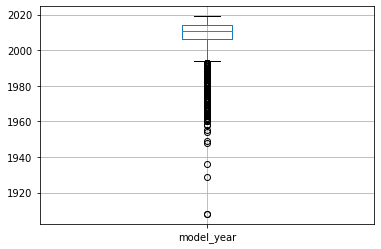

In [49]:
nomiss_myear.boxplot('model_year')

Dari data yang ditampilkan terlihat bahwa nilai pada kolom ini memiliki oulier yang cukup banyak, namun sangat wajar karena tahun model kendaraan mungkin saja ada yang sudah cukup lama dan ada juga model yang keluaran tahun terbaru. Dari data median dan mean yang ditampilkan, nilai yang masuk akal untuk dimasukan kedalam missing value adalah nilai median, karena nilai tahun tidak mungkin bernilai decimal, dan nilai mean adalah nilai decimal, maka dari itu nilai mean sangat tidak masuk akal untuk digunakan, oleh karena itu untuk missing value pada kolom ini nilai median akan jadi paramternya.


In [50]:
median_myear = pd.pivot_table(data=df, columns='model', values='model_year', aggfunc='median')
median_myear

model,acura tl,bmw x5,buick enclave,cadillac escalade,chevrolet camaro,chevrolet camaro lt coupe 2d,chevrolet colorado,chevrolet corvette,chevrolet cruze,chevrolet equinox,...,toyota camry le,toyota corolla,toyota highlander,toyota prius,toyota rav4,toyota sienna,toyota tacoma,toyota tundra,volkswagen jetta,volkswagen passat
model_year,2007.0,2010.0,2012.0,2009.0,2013.0,2017.0,2015.0,2000.0,2014.0,2013.0,...,2008.0,2010.0,2008.0,2010.0,2010.0,2008.0,2010.0,2009.0,2012.0,2013.0


In [51]:
median_myear['acura tl'][0]

2007.0

In [52]:
df.loc[(df['model']=='acura tl') & (df['model_year'].isna()), 'model_year'] = median_myear['acura tl'][0]

In [53]:
for column in median_myear:
    df.loc[(df['model']==column) & (df['model_year'].isna()), 'model_year'] = median_myear[column][0]
    

In [54]:
def group_fillna(dataframe, col_group, col_miss):
    median_myear = pd.pivot_table(data=dataframe, columns=col_group, values=col_miss, aggfunc='median')
    
    for column in median_myear:
        dataframe.loc[(dataframe[col_group]==column) & (dataframe[col_miss].isna()), col_miss] = median_myear[column][0]
        
    return dataframe
    

In [55]:
df = group_fillna(dataframe=df, col_group='model', col_miss='model_year')
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,unknown,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28


In [56]:
df['model_year'].isna().sum()

0

In [57]:
df.isna().sum().sort_values(ascending=False) / len(df) * 100

price           0.0
model_year      0.0
model           0.0
condition       0.0
cylinders       0.0
fuel            0.0
odometer        0.0
transmission    0.0
type            0.0
paint_color     0.0
is_4wd          0.0
date_posted     0.0
days_listed     0.0
dtype: float64

Dari data yang ditampilkan, semua nilai sudah berubah menjadi 0, itu berarti missing value sudah tidak ditemukan lagi dengan kata lain proses pengisian missing value destiap kolom yang memiliki missing value sudah berhasil diatasi.

### Kesimpulan Nilai-Nilai yang Hilang

Ada beberapa kesimpulan yang dapat diambil dari tahapan-tahapan yang telah dilakukan, diantaranya:
1. Terdapat missing value pada beberapa kolom, yaitu: `is_4wd`, `paint_color`, `odometer`, `cylinders`, `model_year`.
2. Pada kolom `is_4wd`, missing value diisi dengan 0 karena kolom ini berisi niali boolean 1=True sedangkan 0= False.
3. Pada kolom `paint_color`, missing value diisi dengan 'unknown' karena terdapat banyak macam warna di dalam kolom ini, maka langkah yang paling aman adalah menggatinya dengan 'unknown' yang berarti tidak diketahui/kosong.
4. Pada kolom `odometer`, missing value diisi dengan nilai median dikolom `odometer` dan kolom yang jadi paramater pengisiannya adalah kolom `condition`.
5. Pada kolom `cylinders`, missing value diisi dengan nilai median dikolom `cylinders` dan kolom yang jadi paramater pengisiannya adalah kolom `model`.
6. Pada kolom `model_year`, missing value diisi dengan nilai median dikolom `model_year` dan kolom yang jadi paramater pengisiannya adalah kolom `model`.

## Memperbaiki Tipe Data

Dari langkah sebelumnya, missing value pada beberapa kolom sudah berhasil diatasi dan dataset pun kurang lebih sudah lengkap. Sebelum menlajutkan ke tahap selanjutnya, mari periksa terlebih dahulu tipe data di dataset apakah sudah sesuai atau belum.

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [59]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,unknown,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28


In [60]:
df.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

### Mengatasi Tipe Data

Dari data yang ditampilkan, terdapat beberapa kolom dengan tipe data yang belum sesuai. Kolom `date_posted` adalah kolom waktu posting jadi alangkah lebih baik bila kolom ini dirubah ke tipe data datetime. Untuk kolom `days_listed`, `model_year` dan `cylinders` adalah kolom-kolom dengan bilangan bulat bukan decimal, maka kolom-kolom ini dirubah ke tipe data integer. Kolom `is_4wd` adalah kolom dengan nilai boolean jadi hanya True dan False, 1 adalah True dan 0 adalah False. Oleh karena itu lebih baik rubah tipe datanya menjadi boolean.  Untuk kolom `price` dan `odometer`, kolom ini kemungkinan memiliki nilai pecahan, jadi rubah kolom ini ke tipe data float. Untuk kolom sisanya tidak ada perubahan tetap menjadi kolom string
Mari sesuaikan kolom-kolom tersebut dengan format berikut:
1. `date_posted` dirubah mejadi datetime
2. `days_listed`, `model_year`, dan `cylinders` dirubah menjadi int
3. `is_4wd` dirubah menjadi boolean
4. `price` dan `odometer` dirubah menjadi float 
5. `model`, `condition`, `fuel`, `transmission`, `type` dan `paint_color` tidak berubah tetap string.

In [61]:
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d')

In [62]:
df['days_listed'] = df['days_listed'].astype('int')
df['model_year'] = df['model_year'].astype('int')
df['cylinders'] = df['cylinders'].astype('int')

In [63]:
df['is_4wd'] = df['is_4wd'].astype('bool')

In [64]:
df['price'] = df['price'].astype('float')
df['odometer'] = df['odometer'].astype('float')

In [65]:
df.dtypes

price                  float64
model_year               int64
model                   object
condition               object
cylinders                int64
fuel                    object
odometer               float64
transmission            object
type                    object
paint_color             object
is_4wd                    bool
date_posted     datetime64[ns]
days_listed              int64
dtype: object

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  float64       
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.8+ MB


In [67]:
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400.0,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19
1,25500.0,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50
2,5500.0,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79
3,1500.0,2003,ford f-150,fair,8,gas,181613.0,automatic,pickup,unknown,False,2019-03-22,9
4,14900.0,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28
5,14990.0,2014,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,True,2018-06-20,15
6,12990.0,2015,toyota camry,excellent,4,gas,79212.0,automatic,sedan,white,False,2018-12-27,73
7,15990.0,2013,honda pilot,excellent,6,gas,109473.0,automatic,SUV,black,True,2019-01-07,68
8,11500.0,2012,kia sorento,excellent,4,gas,104174.0,automatic,SUV,unknown,True,2018-07-16,19
9,9200.0,2008,honda pilot,excellent,6,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17


Semua kolom tipe datanya sudah sesuai atau sudah diatasi.

### Kesimpulan Tipe Data
Terdapat beberapa kolom yang memilki tipe data yang belum sesuai, kolom-kolom tersebut adalah:
1. `date_posted`
2. `days_listed`
3. `model_year`
4. `cylinders`
5. `is_4wd`
6. `price`
7. `odometer`

Untuk format perubahaanya adalah sebagai berikut:
1. `date_posted` --> datetime, 
    karena kolom ini berisi nilai waktu dengan formah year, month, day.
2. `days_listed`, `model_year`, `cylinders` --> int, 
    karena kemungkinan besar berisi variabel bilangan bulat
3. `is_4wd` --> boolean, 
    karena ini kolom ini berisi niali Boolean.
4. `price` dan `odometer` --> float, 
    karena kolom ini mungkin memiliki nilai pecahan.
5. `model`, `condition`, `fuel`, `transmission`, `type` dan `paint_color` 
    tidak ada perubahan tipe data.

# Tahap - 3. Memperbaiki Kualitas Data

In [68]:
df.head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400.0,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19
1,25500.0,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50
2,5500.0,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79
3,1500.0,2003,ford f-150,fair,8,gas,181613.0,automatic,pickup,unknown,False,2019-03-22,9
4,14900.0,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28


## Menambahkan Kolom

Dari 5 baris dataset diatas, terlihat bahwa ada beberapa kolom yang bisa digunakan untuk mempermudah analisis dengan menambahkan beberapa kolom kesamping. Berikut adalah beberapa kolom yang mungkin bisa dipakai untuk mempermudah analisis:
1. Menambahkan kolom day posted, month posted dan year posted untuk mempermudah melihat berapa hari, bulan dan tahun setelah iklan ditayangkan
2. Menambahkan kolom usia kendaraan (dalam tahun) ketika iklan ditayangkan
3. Menambah kolom jarak tempuh rata rata kendaraan per tahunnya
4. Merubah kolom kondisi kendaraan dengan format:
   * new = 5
   * like new = 4
   * excellent = 3
   * good = 2
   * fair = 1
   * salvage = 0

Mari lakukan langkah-langkah diatas secara berurutan.

In [69]:
# Tambahkan nilai waktu dan tanggal pada saat iklan ditayangkan
df['day_posted'] = df['date_posted'].dt.day
df['month_posted'] = df['date_posted'].dt.month
df['year_posted'] = df['date_posted'].dt.year

In [70]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted
0,9400.0,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,23,6,2018
1,25500.0,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,19,10,2018
2,5500.0,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,7,2,2019
3,1500.0,2003,ford f-150,fair,8,gas,181613.0,automatic,pickup,unknown,False,2019-03-22,9,22,3,2019
4,14900.0,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2,4,2019


Kolom baru dengan hari, bulan dan tahun sudah berhasil ditambahkan. Langkah selajutnya yaitu membuat kolom baru untuk usia kendaraan. Kolom baru ini menampilkan usia kendaraan berdasarkan tahun iklan dan tahun dimana model kendaraan itu dibuat. Secara garis besar, kolom usia kendaraan adalah nilai pada kolom `yead_posted` dikurangi dengan nilai pada kolom `model_posted`. 

Mari buat kolom baru dengan nama kolom `age_car`.

In [71]:
# Tambahkan usia kendaraan saat iklan ditayangkan
df['age_car'] = (df['year_posted'] - df['model_year']).astype(int) + 1
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,age_car
0,9400.0,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,23,6,2018,8
1,25500.0,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,19,10,2018,8
2,5500.0,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,7,2,2019,7
3,1500.0,2003,ford f-150,fair,8,gas,181613.0,automatic,pickup,unknown,False,2019-03-22,9,22,3,2019,17
4,14900.0,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2,4,2019,3


Kolom `age_car` sudah berhasil ditambahkan. Namun kolom ini sedikit unik karena kolom ini menampilkan pengurangan antara `year_posted` dan `model_year` otomatis nilai dikolom ini pasti ada yang 0 karena ada beberapa data yang memiliki nilai yang sama pada kolom `year_posted` dan `model_year`. Oleh karena itu, untuk menghindari nilai 0 yang akan menggagu proses analisis kedepannya, maka hasil dari pengurangan tersebut bisa ditambahkan dengan 1. Jadi di data kolom umur kendaraan ini tidak akan ada yang memiliki nilai 0.

 Langkah selanjutnya adalah membuat kolom dengan nilai jarak tempuh rata-rata dari kendaraan per tahunnya. Untuk menghitung rata-rata jarak tempuh kendaran pertahun adalah dengan membagi jarak tempuh kendaraan dengan umur kendaraan pertahun.

Mari buat kolom baru dengan nama `avg_odometer_year`

In [72]:
# Tambahkan jarak tempuh rata-rata kendaraan per tahun 
df['avg_odometer_year'] = df['odometer'] / df['age_car']
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,age_car,avg_odometer_year
0,9400.0,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,23,6,2018,8,18125.000000
1,25500.0,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,19,10,2018,8,11088.125000
2,5500.0,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,7,2,2019,7,15714.285714
3,1500.0,2003,ford f-150,fair,8,gas,181613.0,automatic,pickup,unknown,False,2019-03-22,9,22,3,2019,17,10683.117647
4,14900.0,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2,4,2019,3,26967.666667


## Merubah Nilai pada Kolom

Kolom jarak tempuh rata-rata per tahun sudah berhasil ditambahkan. Langkah selanjutnya adalah menggati nilai pada kolom `condition` dari string menjadi skala numerik, dengan format sebgai berikut:
* new = 5
* like new = 4
* excellent = 3
* good = 2
* fair = 1
* salvage = 0

In [73]:
# Mungkin membantu untuk mengganti nilai pada kolom 'condition' dengan sesuatu yang bisa dimanipulasi lebih mudah
def group_of_condition(condition):
    if condition == 'new':
        return 5
    elif condition == 'like new':
        return 4
    elif condition == 'excellent':
        return 3
    elif condition == 'good':
        return 2
    elif condition == 'fair':
        return 1
    else:
        return 0


In [74]:
df['condition'] = df['condition'].apply(group_of_condition)
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,age_car,avg_odometer_year
0,9400.0,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,23,6,2018,8,18125.000000
1,25500.0,2011,ford f-150,2,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,19,10,2018,8,11088.125000
2,5500.0,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,7,2,2019,7,15714.285714
3,1500.0,2003,ford f-150,1,8,gas,181613.0,automatic,pickup,unknown,False,2019-03-22,9,22,3,2019,17,10683.117647
4,14900.0,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2,4,2019,3,26967.666667


In [75]:
df['condition'].value_counts()

3    24773
2    20145
4     4742
1     1607
5      143
0      115
Name: condition, dtype: int64

Kolom `condition` sekarang sudah berganti nilai dari string menjadi skala numerik sesuai dengan format yang dibuat.

## Kesimpulan

Dari langkah-langkah diatas, kesimpulan yang dapat diambil, diantaranya:
1. Menambahkan kolom: 
    * `day_posted` yang berisi nilai hari dari kolom `date_posted` 
    * `month_posted` yang berisi nilai bulan dari kolom `date_posted`
    * `year_posted` yang berisi nilai tahun dari kolom `date_posted`
2. Menambahkan kolom `age_car` yang berisi nilai dari usia kendaraan ketika iklan ditayangkan.
3. Menambah kolom `avg_odo_year` yang berisi jarak tempuh rata rata kendaraan per tahunnya.
4. Merubah kolom `condition` dengan format kondisi kendaraan sebagai berikut:
   * new = 5
   * like new = 4
   * excellent = 3
   * good = 2
   * fair = 1
   * salvage = 0


# Tahap - 4. Analisis Data Eksploratif

## Memeriksa Data yang Sudah Bersih

Setelah melakukan langkah-langkah diatas, dataset pun sudah dapat digunakan untuk analisis. Untuk memastikanya mari tampilkan keseluruhan dataset sekali lagi.  

In [76]:
# menampilkan informasi/rangkuman umum tentang DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   price              51525 non-null  float64       
 1   model_year         51525 non-null  int64         
 2   model              51525 non-null  object        
 3   condition          51525 non-null  int64         
 4   cylinders          51525 non-null  int64         
 5   fuel               51525 non-null  object        
 6   odometer           51525 non-null  float64       
 7   transmission       51525 non-null  object        
 8   type               51525 non-null  object        
 9   paint_color        51525 non-null  object        
 10  is_4wd             51525 non-null  bool          
 11  date_posted        51525 non-null  datetime64[ns]
 12  days_listed        51525 non-null  int64         
 13  day_posted         51525 non-null  int64         
 14  month_

In [77]:
# tampilkan sampel data 
df.sample(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,age_car,avg_odometer_year
50711,22995.0,2013,ram 2500,3,8,gas,58000.0,automatic,truck,unknown,True,2018-08-20,14,20,8,2018,6,9666.666667
38600,4200.0,2009,ford edge,2,6,gas,116678.0,automatic,SUV,silver,False,2018-06-30,104,30,6,2018,10,11667.800000
22719,8450.0,2014,ram 3500,3,8,gas,200649.0,automatic,truck,red,False,2019-01-02,31,2,1,2019,6,33441.500000
37114,4477.0,2002,toyota rav4,3,4,gas,202078.0,automatic,SUV,silver,True,2019-03-17,76,17,3,2019,18,11226.555556
10321,7900.0,2012,nissan frontier,2,6,gas,175000.0,automatic,truck,custom,False,2018-11-25,33,25,11,2018,7,25000.000000
43875,38900.0,2017,ford f-250 super duty,3,8,gas,72796.0,automatic,truck,white,True,2018-06-02,39,2,6,2018,2,36398.000000
736,3000.0,2003,toyota camry,3,4,gas,165000.0,automatic,sedan,silver,False,2018-12-09,34,9,12,2018,16,10312.500000
12934,3800.0,2007,honda accord,3,4,gas,104230.0,other,sedan,unknown,False,2018-08-14,7,14,8,2018,12,8685.833333
39037,5395.0,2005,chevrolet trailblazer,3,6,gas,104230.0,automatic,SUV,white,False,2018-09-10,22,10,9,2018,14,7445.000000
22489,1200.0,2006,jeep liberty,1,6,gas,123.0,automatic,SUV,white,True,2019-03-23,9,23,3,2019,14,8.785714


## Mempelajari Parameter Inti 

Ada beberapa kolom yang menjadi parameter inti untuk melakukan analisis. Kolom-kolom yang perlu diamatai lebih lanjut adalah sebagai berikut:
- Kolom `price` berisi nilai harga.
- Kolom `cylinders` berisi jumlah silinder pada mobil.
- Kolom `age_car` berisi nilai umur kendaraan.
- Kolom `avg_odometer_year` berisi nilai rata-rata jarak tempuh per tahun kendaraan.
- Kolom `condition` berisi kategori dari kondisi kendaraan.

Mari pelajari parameter diatas lalu perhatikan bagaimana outlier memengaruhi bentuk dan kemudahan pembacaan histogram. 

In [78]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,age_car,avg_odometer_year
0,9400.0,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,23,6,2018,8,18125.000000
1,25500.0,2011,ford f-150,2,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,19,10,2018,8,11088.125000
2,5500.0,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,7,2,2019,7,15714.285714
3,1500.0,2003,ford f-150,1,8,gas,181613.0,automatic,pickup,unknown,False,2019-03-22,9,22,3,2019,17,10683.117647
4,14900.0,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2,4,2019,3,26967.666667


In [79]:
#
def histogram(dataframe, column):
    plt.figure(figsize=(8, 4))
    plt.title(f'Histogram pada kolom {column}')
    sns.histplot(dataframe[column])
    plt.show()
    print(f'Rata-rata kolom {column}: {dataframe[column].mean()}')
    print(f'Median kolom {column}: {dataframe[column].median()}')



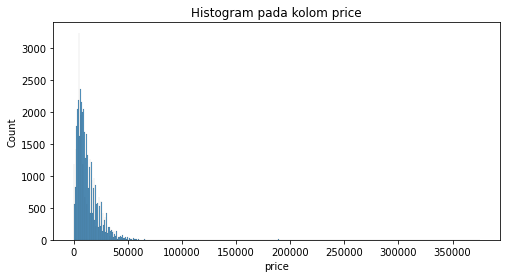

Rata-rata kolom price: 12132.464919941776
Median kolom price: 9000.0


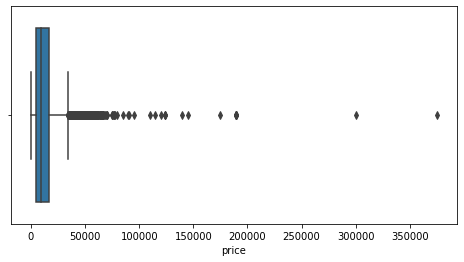

In [80]:
histogram(dataframe=df, column='price')
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='price')
plt.show()

Findings:
- Data harga tersebar dari 0 s/d 40000.
- Ada data outlier yang mencapai 350000.
- Rata-rata harga mobil dijual dengan harga 12000.
- 50% mobil dijual dengan harga 9000

Insights:
- Jarang orang menjual mobil dengan harga yang mahal.
- Mobil yang dijual diwebsite kebanyakan dijual dengan harga 12000.

Recommendations:
- Jika ingin menjual mobil dengan cepat, maka jual mobil di bawah harga rata-rata (12000).

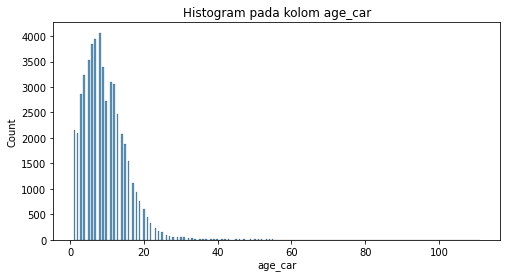

Rata-rata kolom age_car: 9.513905870936439
Median kolom age_car: 9.0


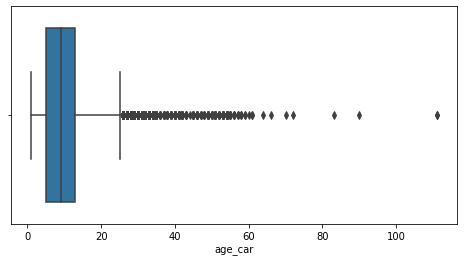

In [81]:
#
histogram(dataframe=df, column='age_car')
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='age_car')
plt.show()


Findings:
- Data umur mobil tersebar dari 1 s/d 25 tahun.
- Ada data outlier umur mobil yang mencapai lebih dari 100 tahun.
- Rata-rata umur mobil 8 s/d 9 tahun.
- 50% mobil berumur 8 tahun.

Insights:
- Jarang mobil yang memiliki umur diatas 25 tahun.  
- Mobil yang dijual di website berkisar antara 8 s/d 9 tahun.

Recommendations:
- Semakin umur mobil bertambah maka semakin susah pula untuk menjualnya. Bila ingin cepat mejual mobil, jual mobil dengan kisaran umur dibawah 8.5 tahun.

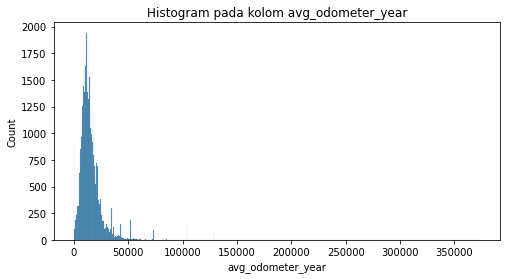

Rata-rata kolom avg_odometer_year: 15378.48276538236
Median kolom avg_odometer_year: 13036.181818181818


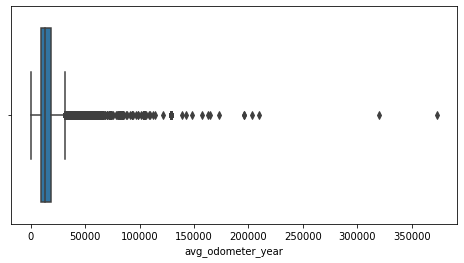

In [82]:
histogram(dataframe=df, column='avg_odometer_year')
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='avg_odometer_year')
plt.show()

Findings:
- Data jarak tempuh rata-rata mobil per tahunya tersebar dari 0 s/d sekitar 40 ribu.
- Ada data outlier jarak tempuh rata-rata per tahun yang mencapai 350 ribu.
- Rata-rata dari rata-rata jarak tempuh mobil per tahunnya adalah 15378.
- 50% mobil memiliki rata-rata jarak tempuh pertahun adalah 13 ribu.

Insights:
- Jarang orang menjual mobil dengan rata-rata jarak tempuh pertahun lebih dari 40 ribu.
- Mobil yang dijual diwebsite kebanyakan memiliki jarak tempuh sekitar 15 ribu.


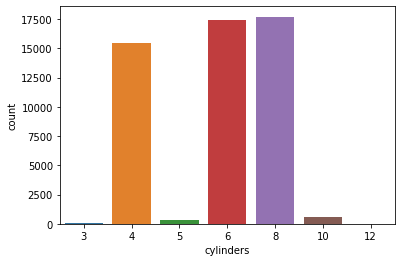

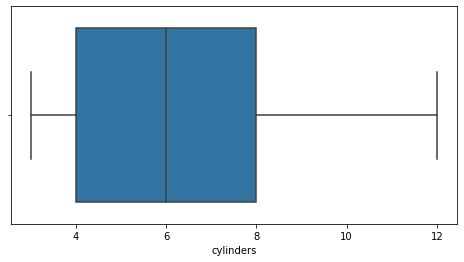

In [83]:
#
sns.countplot(data=df, x='cylinders')
plt.show()
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='cylinders')
plt.show()

Findings:
- Data silinder mobil tersebar dari 0 sampai 12.
- Mobil yang paling banyak dijual di website adalah mobil yang memiliki silinder 8, 6 dan 4.
- Sangat jarang mobil yang di jual di website yang memiliki silinder 3, 5, dan 10.

Insights:
- Mobil dengan silinder 3, 5, 10 kemungkinan adalah mobil langka dan mungkin mobil ini sulit untuk dijual.

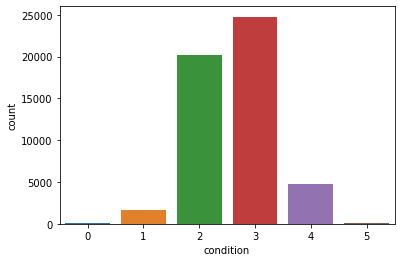

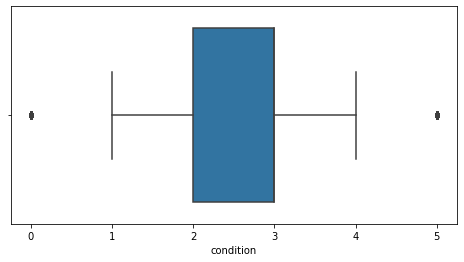

In [84]:
#
sns.countplot(data=df, x='condition')
plt.show()
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='condition')
plt.show()

Findings:
- Mobil yang paling banyak dijual di website adalah mobil yang memiliki kondisi excellent dan good.
- Mobil dengan kondisi salvage dan new sangat jarang dijual di website.

Insights:
- Mobil dengan kondisi new sangat jarang dijual diwebsite, mungkin karena mobil dengan kondisi ini kebanyakan dijual di show room mobil yang resmi.

Recommendations:
- Bila ingin menjual mobil dengan cepat, jual mobil di kondisi 2 atau 3 (excellent atau good).

## Mempelajari dan Menangani Outlier

Berdasarkan hasil di atas, mari tentukan kolom yang mungkin berisi outlier dan buat Dataframe baru yang berisi data tanpa outlier. Sebelum itu mari buat paramater untuk mengidentifikasi kolom yang berisi outlier dengan menentukan batas bawah dan batas ata 

Berdasarkan hasil di atas, tentukan kolom apa yang mungkin berisi outlier dan buat sebuah DataFrame tanpa outlier tersebut. Petunjuk: Outlier bisa diidentifikasi dengan menentukan batas bawah/atas untuk rentang nilai normal.

In [85]:
def up_low_whisker(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    
    IQR = Q3 - Q1

    lower_whisker = Q1 - (1.5 * IQR)
    upper_whisker = Q3 + (1.5 * IQR)

    return lower_whisker, upper_whisker

In [86]:
up_low_whisker(df['price'])

(-12758.5, 34597.5)

In [87]:
up_low_whisker(df['cylinders'])

(-2.0, 14.0)

In [88]:
up_low_whisker(df['age_car'])

(-7.0, 25.0)

In [89]:
up_low_whisker(df['avg_odometer_year'])

(-3924.242424242424, 31510.10101010101)

In [90]:
up_low_whisker(df['condition'])

(0.5, 4.5)

Untuk batas-batas menangani outlier sudah didapat disetiap parameter inti, langkah selanjutnya mari simpan data tanpa outlier dalam DataFrame yang terpisah.

Untuk memudahkan langkah selanjutnya dan proses analisis ke depannya, mari buat fungsi terlebih dahulu untuk memudahkan proses analisis, terlebih data yang didapatkan ada 2 dataframe yaitu data sebelum proses pembersihan outlier dan data yang sudah dibersihkan tanpa outlier. Proses analisis ini akan membandingkan kedua dataframe tersebut, dengan membuat fungsi proses membandingkan akan terlihat lebih rapih. Mari buat fungsi nya.

In [91]:
def outlier_cleansing(dataframe, column):

    lower, upper = up_low_whisker(dataframe[column])
    print(f'lower values : {lower}')
    print(f'upper values : {upper}')

    plt.title(f'{column} - Before cleaning outlier!')
    sns.boxplot(data=dataframe, x=column)
    plt.show()

    dataframe = dataframe[(dataframe[column] > lower) & (dataframe[column] < upper)]

    lower_check, upper_check = up_low_whisker(dataframe[column])
    print(f'lower_check values : {lower_check}')
    print(f'upper_check values : {upper_check}')

    plt.title(f'{column} - After cleaning outlier!')
    sns.boxplot(data=dataframe, x=column)
    plt.show()

    if lower == lower_check or upper == upper_check:
        print(f'\n====== [FINISHED] outlier in [{column}] column has been clear! ====== \n')
        return dataframe
    
    else:
        print(f'\n------ [RE-START] cleaning outlier in {column} column ------ \n')
        dataframe = outlier_cleansing(dataframe=dataframe, column=column)
        return dataframe



====== [START] cleaning outlier in price column ====== 

lower values : -12758.5
upper values : 34597.5


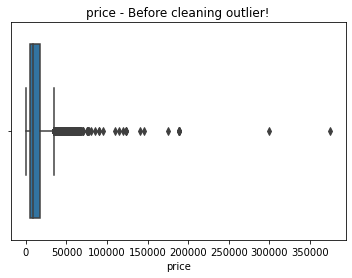

lower_check values : -11362.5
upper_check values : 32257.5


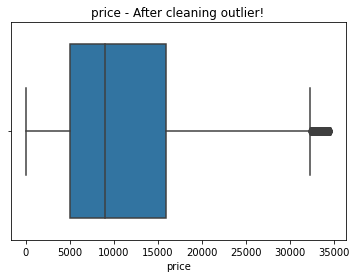


------ [RE-START] cleaning outlier in price column ------ 

lower values : -11362.5
upper values : 32257.5


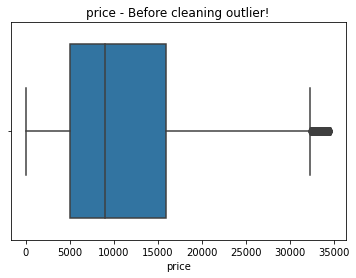

lower_check values : -10762.5
upper_check values : 31257.5


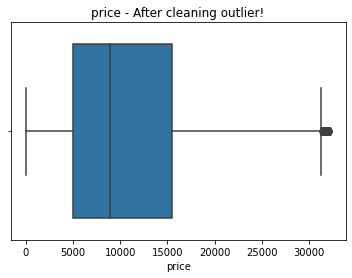


------ [RE-START] cleaning outlier in price column ------ 

lower values : -10762.5
upper values : 31257.5


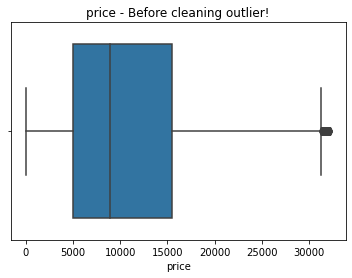

lower_check values : -10012.5
upper_check values : 30007.5


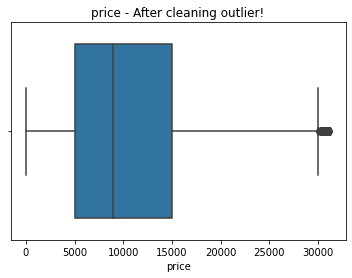


------ [RE-START] cleaning outlier in price column ------ 

lower values : -10012.5
upper values : 30007.5


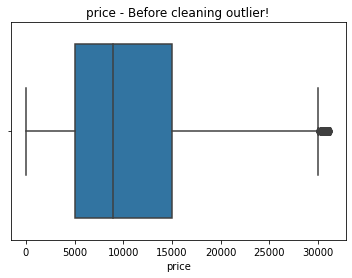

lower_check values : -10011.0
upper_check values : 30005.0


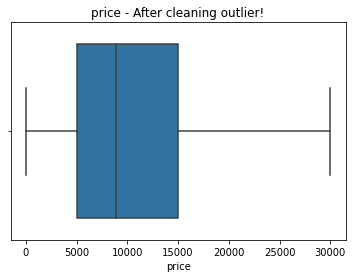


------ [RE-START] cleaning outlier in price column ------ 

lower values : -10011.0
upper values : 30005.0


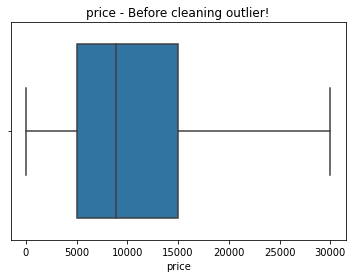

lower_check values : -10011.0
upper_check values : 30005.0


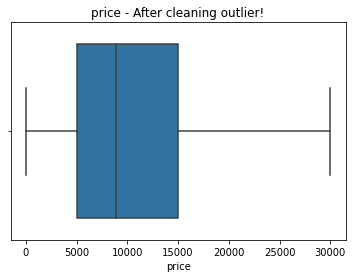


====== [FINISHED] outlier in [price] column has been clear! ====== 


====== [START] cleaning outlier in cylinders column ====== 

lower values : -2.0
upper values : 14.0


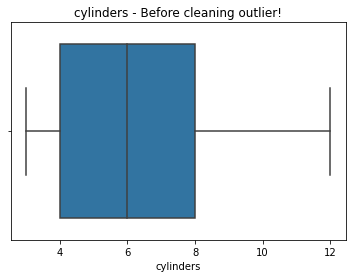

lower_check values : -2.0
upper_check values : 14.0


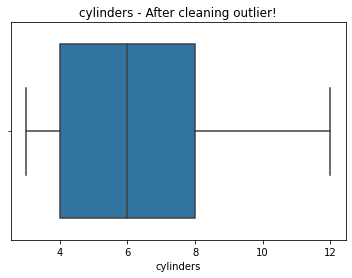


====== [FINISHED] outlier in [cylinders] column has been clear! ====== 


====== [START] cleaning outlier in age_car column ====== 

lower values : -4.5
upper values : 23.5


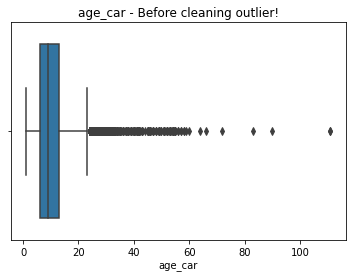

lower_check values : -4.5
upper_check values : 23.5


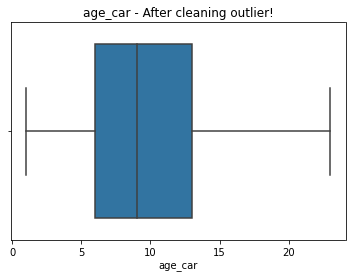


====== [FINISHED] outlier in [age_car] column has been clear! ====== 


====== [START] cleaning outlier in avg_odometer_year column ====== 

lower values : -3286.095716783215
upper values : 30939.257430069927


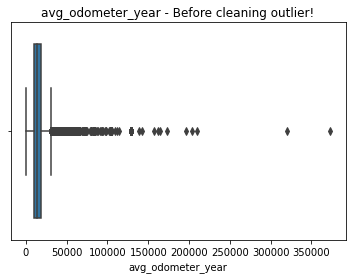

lower_check values : -2180.518849206348
upper_check values : 28657.71130952381


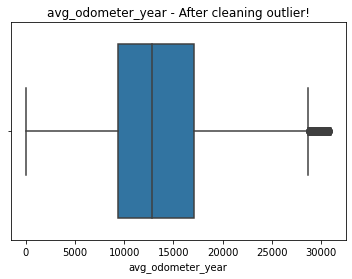


------ [RE-START] cleaning outlier in avg_odometer_year column ------ 

lower values : -2180.518849206348
upper values : 28657.71130952381


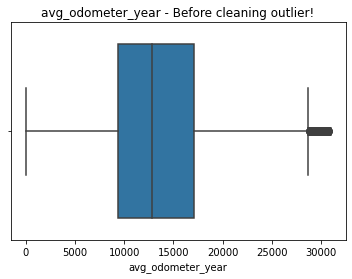

lower_check values : -1954.7166666666653
upper_check values : 28146.75


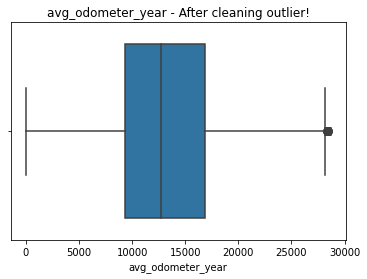


------ [RE-START] cleaning outlier in avg_odometer_year column ------ 

lower values : -1954.7166666666653
upper values : 28146.75


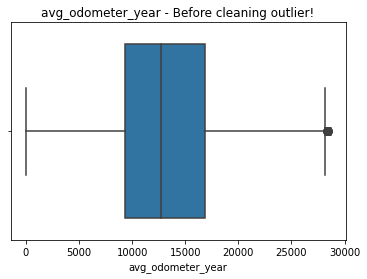

lower_check values : -1905.2332535885216
upper_check values : 28052.230861244025


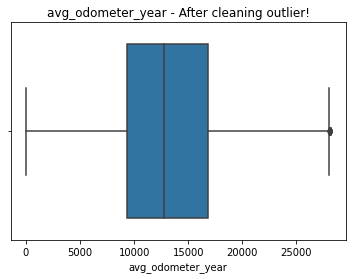


------ [RE-START] cleaning outlier in avg_odometer_year column ------ 

lower values : -1905.2332535885216
upper values : 28052.230861244025


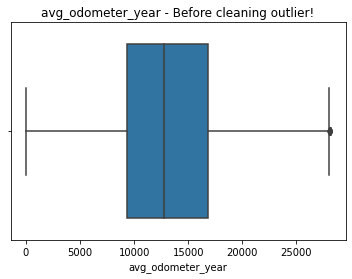

lower_check values : -1908.665530303033
upper_check values : 28053.664772727272


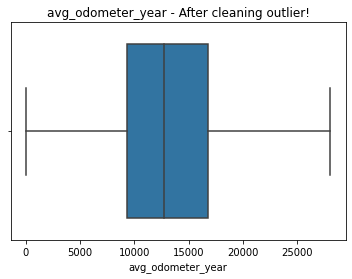


------ [RE-START] cleaning outlier in avg_odometer_year column ------ 

lower values : -1908.665530303033
upper values : 28053.664772727272


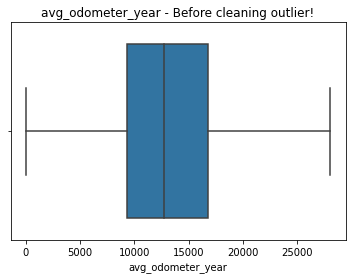

lower_check values : -1908.665530303033
upper_check values : 28053.664772727272


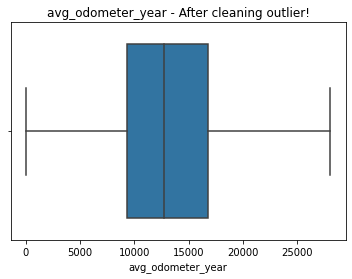


====== [FINISHED] outlier in [avg_odometer_year] column has been clear! ====== 


====== [START] cleaning outlier in condition column ====== 

lower values : 0.5
upper values : 4.5


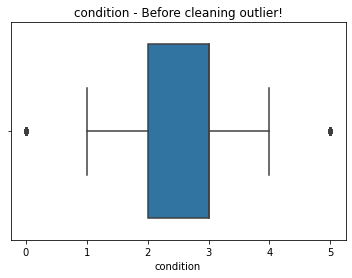

lower_check values : 0.5
upper_check values : 4.5


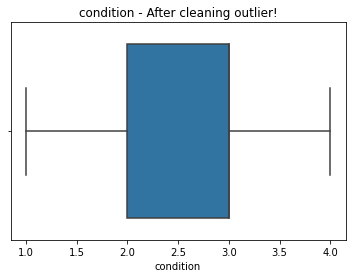


====== [FINISHED] outlier in [condition] column has been clear! ====== 



In [92]:
new_df = df.copy()
list_of_selected_column = ['price', 'cylinders', 'age_car', 'avg_odometer_year', 'condition']

for column in list_of_selected_column:
    print(f'\n====== [START] cleaning outlier in {column} column ====== \n')
    new_df = outlier_cleansing(dataframe=new_df, column=column)

<AxesSubplot:>

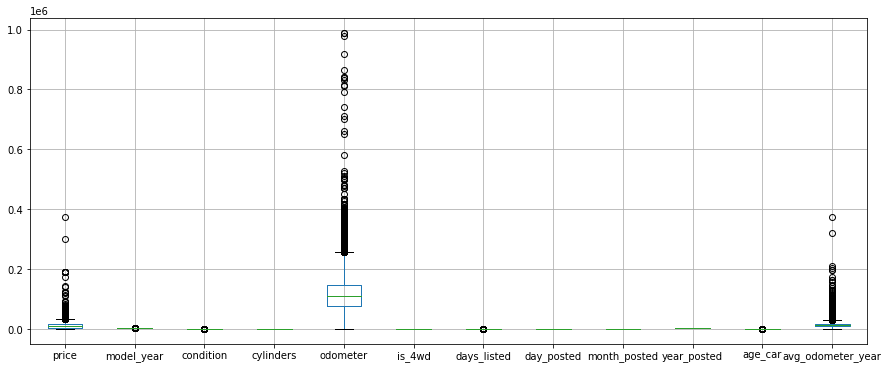

In [93]:
plt.figure(figsize=(15, 6))
df.boxplot()

<AxesSubplot:>

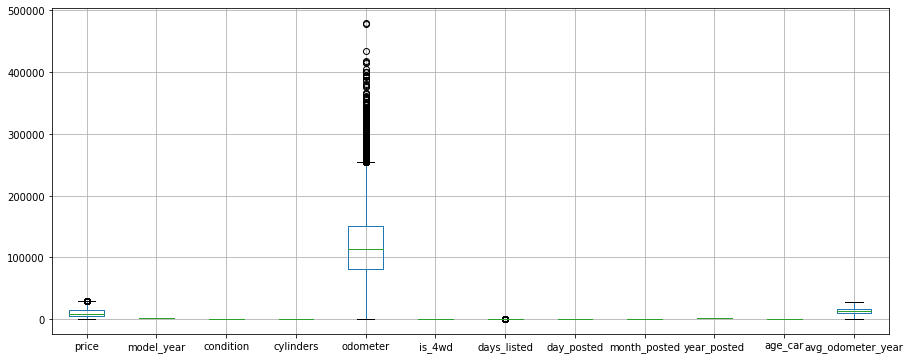

In [94]:

plt.figure(figsize=(15, 6))
new_df.boxplot()

Data yang sudah bersih dari outlier sudah disimpan ke dataframe baru yang bernama new_df. Terlihat pada boxplot diatas perbandingan antara df dan new_df. Pada new_df tersisa outlier di kolo `odometer`, karena kolom ini tidak termasuk kedalam kolom yang diamati maka kolom ini masih menysakan outlier didalamnya. Dapat disimpulkan bahwa outlier pada kolom kolom inti sudah dapat diatas dan disimpan ke dalam dataframe baru yaitu new_df. 

Mari lanjutkan proses analisis dengan membandingkan kolom-kolom inti antara kedua dataframe tersebut.  

## Mempelajari Parameter Inti Tanpa Outlier

Mari buat grafik baru dengan menggunakan tabel baru yang telah di filter tanpa outlier. Mari tampilkan grafiknya agar dapat dibandingkan dengan grafik sebelum nya (berisi outlier). 


Kolom yang perlu diamati:
- Kolom `price` berisi nilai harga.
- Kolom `cylinders` berisi jumlah silinder pada mobil.
- Kolom `age_car` berisi nilai umur kendaraan.
- Kolom `avg_odometer_year` berisi nilai rata-rata jarak tempuh per tahun kendaraan.
- Kolom `condition` berisi kategori dari kondisi kendaraan.


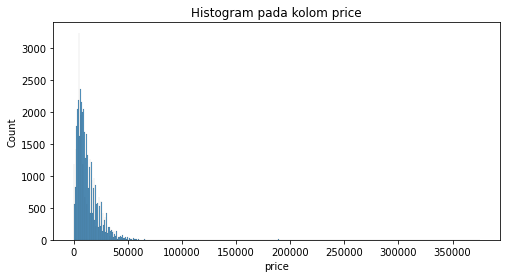

Rata-rata kolom price: 12132.464919941776
Median kolom price: 9000.0


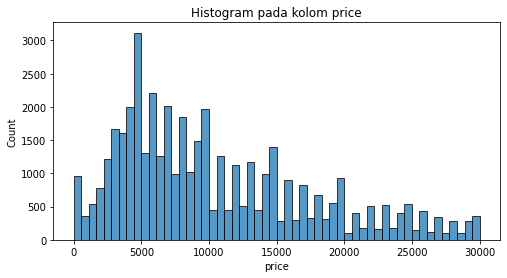

Rata-rata kolom price: 10445.602890199432
Median kolom price: 8500.0


In [95]:
histogram(dataframe=df, column='price')
histogram(dataframe=new_df, column='price')

lower values : -9950.0
upper values : 29890.0


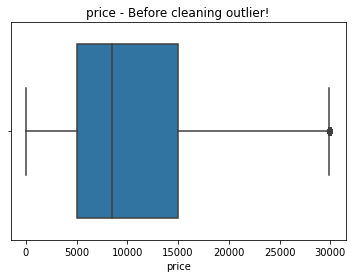

lower_check values : -9806.25
upper_check values : 29563.75


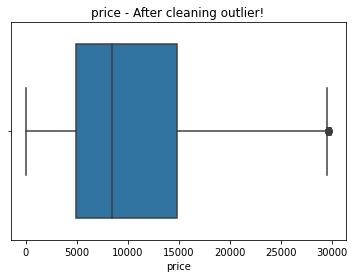


------ [RE-START] cleaning outlier in price column ------ 

lower values : -9806.25
upper values : 29563.75


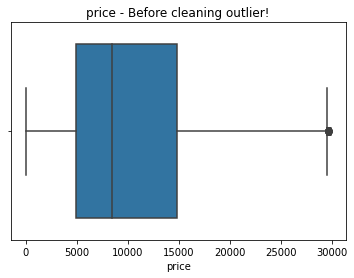

lower_check values : -9790.875
upper_check values : 29518.125


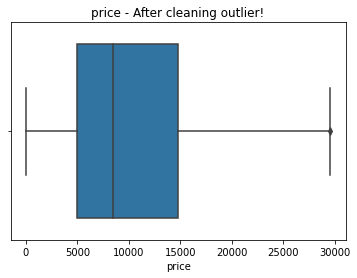


------ [RE-START] cleaning outlier in price column ------ 

lower values : -9790.875
upper values : 29518.125


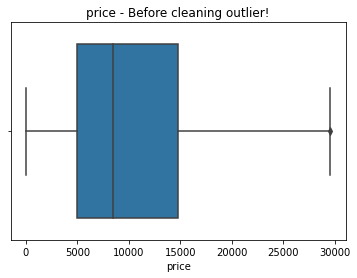

lower_check values : -9790.5
upper_check values : 29517.5


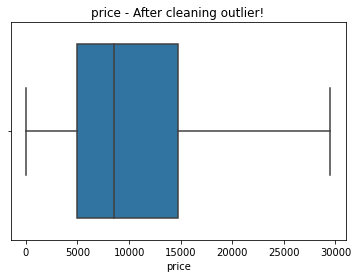


------ [RE-START] cleaning outlier in price column ------ 

lower values : -9790.5
upper values : 29517.5


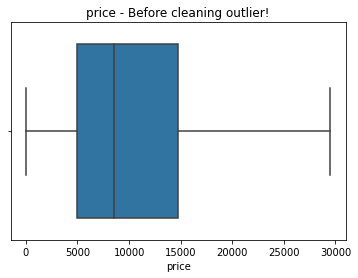

lower_check values : -9790.5
upper_check values : 29517.5


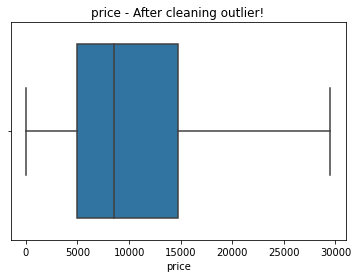


====== [FINISHED] outlier in [price] column has been clear! ====== 



,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,age_car,avg_odometer_year
0,9400.0,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,23,6,2018,8,18125.000000
1,25500.0,2011,ford f-150,2,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,19,10,2018,8,11088.125000
2,5500.0,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,7,2,2019,7,15714.285714
3,1500.0,2003,ford f-150,1,8,gas,181613.0,automatic,pickup,unknown,False,2019-03-22,9,22,3,2019,17,10683.117647
4,14900.0,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2,4,2019,3,26967.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51519,11750.0,2015,honda accord,3,4,gas,104230.0,automatic,coupe,unknown,False,2018-11-24,89,24,11,2018,4,26057.500000
51520,9249.0,2013,nissan maxima,4,6,gas,88136.0,automatic,sedan,black,False,2018-10-03,37,3,10,2018,6,14689.333333
51522,3950.0,2009,hyundai sonata,3,4,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32,15,11,2018,10,12800.000000
51523,7455.0,2013,toyota corolla,2,4,gas,139573.0,automatic,sedan,black,False,2018-07-02,71,2,7,2018,6,23262.166667


In [96]:
outlier_cleansing(dataframe=new_df, column='price')

Findings:
- Setelah beberapa kali percobaan mengatasi outlier, didapat batas atas outlier adalah 30000
- Data harga di tabel baru tanpa outlier tersebar dari 0 s/d 30000.
- Rata-rata harga mobil di tabel baru memiliki nilai yang sedikit berbeda yaitu sekitar 10000.
- 50% mobil ditabel bari dijual dengan harga 8500.

Insights:
- Harga mobil diatas 30000 adalah harga yang jarang dijual
- Harga mobil yang dijual pada tabel baru kebanyakan dijual dengan harga sekitar 10000

Recommendations:
- Berdasarkan tabel baru, bila ingin menjual mobil dengan cepat maka jual mobil di bawah harga rata-rata yaitu 11000.

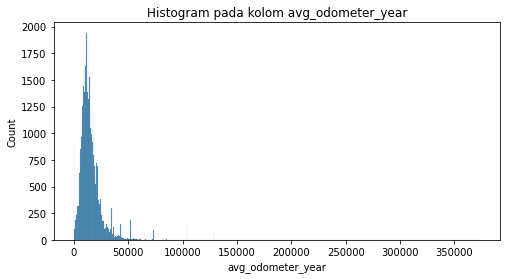

Rata-rata kolom avg_odometer_year: 15378.48276538236
Median kolom avg_odometer_year: 13036.181818181818


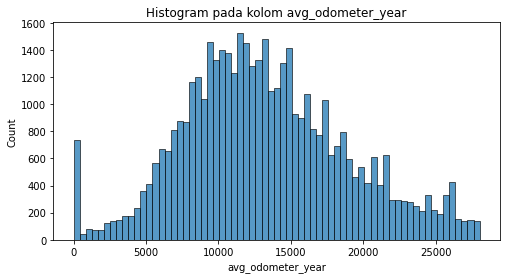

Rata-rata kolom avg_odometer_year: 13242.963916947909
Median kolom avg_odometer_year: 12738.5


In [97]:
histogram(dataframe=df, column='avg_odometer_year')
histogram(dataframe=new_df, column='avg_odometer_year')

lower values : -1908.447510822507
upper values : 28069.634740259735


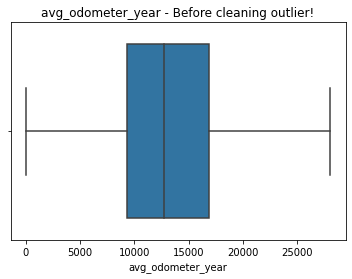

lower_check values : -1908.447510822507
upper_check values : 28069.634740259735


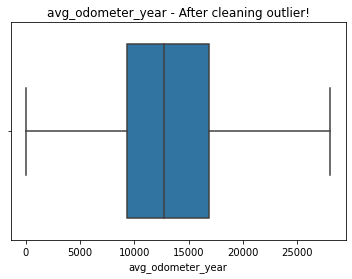


====== [FINISHED] outlier in [avg_odometer_year] column has been clear! ====== 



,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,age_car,avg_odometer_year
0,9400.0,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,23,6,2018,8,18125.000000
1,25500.0,2011,ford f-150,2,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,19,10,2018,8,11088.125000
2,5500.0,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,7,2,2019,7,15714.285714
3,1500.0,2003,ford f-150,1,8,gas,181613.0,automatic,pickup,unknown,False,2019-03-22,9,22,3,2019,17,10683.117647
4,14900.0,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2,4,2019,3,26967.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51519,11750.0,2015,honda accord,3,4,gas,104230.0,automatic,coupe,unknown,False,2018-11-24,89,24,11,2018,4,26057.500000
51520,9249.0,2013,nissan maxima,4,6,gas,88136.0,automatic,sedan,black,False,2018-10-03,37,3,10,2018,6,14689.333333
51522,3950.0,2009,hyundai sonata,3,4,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32,15,11,2018,10,12800.000000
51523,7455.0,2013,toyota corolla,2,4,gas,139573.0,automatic,sedan,black,False,2018-07-02,71,2,7,2018,6,23262.166667


In [98]:
outlier_cleansing(dataframe=new_df, column='avg_odometer_year')

Findings:
- Pada tabel baru, data jarak tempuh rata-rata mobil pertahun tersebar dari 0 s/d 28 ribu.
- Jarak tempuh mobil yang lebih dari 28 ribu tergolong sedikit
- Rata-rata jarak tempuh mobil pertahunnya adalah 13000
- 50% mobil memiliki jarak tempuh 12700.

Insights:
- Bedasarkan tabel baru, jarang mobil dijual dengan jarak tempuh lebih dari 28 ribu.
- Mobil yang dijual diwebsite berdasarkan tabel baru kebanyakan memiliki jarak tempuh sekitar 13000.


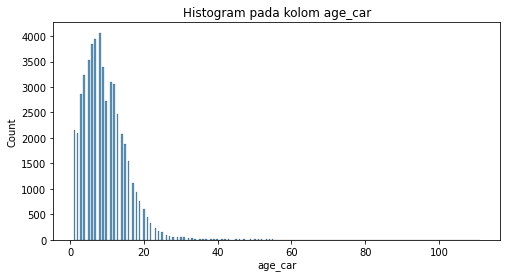

Rata-rata kolom age_car: 9.513905870936439
Median kolom age_car: 9.0


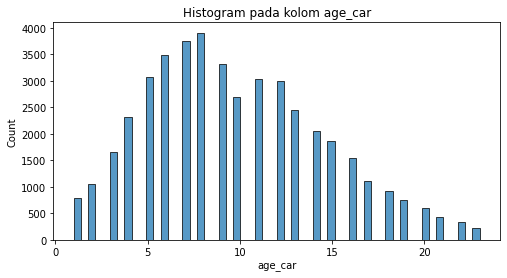

Rata-rata kolom age_car: 9.780601449601585
Median kolom age_car: 9.0


In [99]:
histogram(dataframe=df, column='age_car')
histogram(dataframe=new_df, column='age_car')

lower values : -4.5
upper values : 23.5


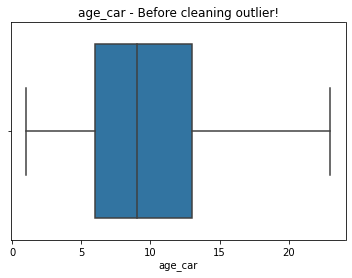

lower_check values : -4.5
upper_check values : 23.5


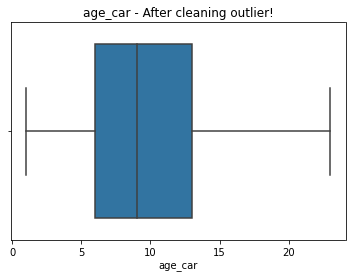


====== [FINISHED] outlier in [age_car] column has been clear! ====== 



,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,age_car,avg_odometer_year
0,9400.0,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,23,6,2018,8,18125.000000
1,25500.0,2011,ford f-150,2,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,19,10,2018,8,11088.125000
2,5500.0,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,7,2,2019,7,15714.285714
3,1500.0,2003,ford f-150,1,8,gas,181613.0,automatic,pickup,unknown,False,2019-03-22,9,22,3,2019,17,10683.117647
4,14900.0,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2,4,2019,3,26967.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51519,11750.0,2015,honda accord,3,4,gas,104230.0,automatic,coupe,unknown,False,2018-11-24,89,24,11,2018,4,26057.500000
51520,9249.0,2013,nissan maxima,4,6,gas,88136.0,automatic,sedan,black,False,2018-10-03,37,3,10,2018,6,14689.333333
51522,3950.0,2009,hyundai sonata,3,4,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32,15,11,2018,10,12800.000000
51523,7455.0,2013,toyota corolla,2,4,gas,139573.0,automatic,sedan,black,False,2018-07-02,71,2,7,2018,6,23262.166667


In [100]:
outlier_cleansing(dataframe=new_df, column='age_car')

Findings:
- Berdasarkan tabel baru, data umur mobil tersebar dari 1 s/d 23 tahun.
- Umur mobil yang lebih dari 23 tahun tergolong sedikit atau langka.
- Rata-rata umur mobil yaitu 9-10 tahun.
- 50% mobil berumur 9 tahun.

Insights:
- Jarang mobil yang memiliki umur diatas 23 tahun.  
- Mobil yang dijual kebanyakan berumur 9 tahun.

Recommendations:
- Semakin umur mobil bertambah maka semakin susah pula untuk menjualnya. Bila ingin cepat mejual mobil, jual mobil dengan kisaran umur dibawah 9 tahun.

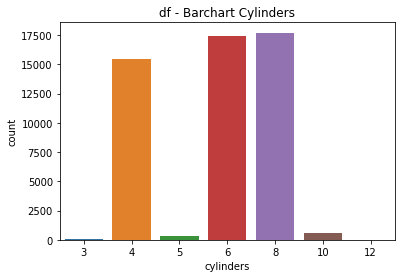

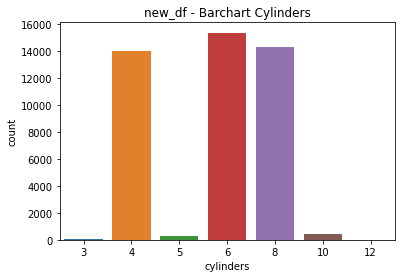

In [101]:
plt.title('df - Barchart Cylinders')
sns.countplot(data=df, x='cylinders')
plt.show()
plt.title('new_df - Barchart Cylinders')          
sns.countplot(data=new_df, x='cylinders')
plt.show()

lower values : -2.0
upper values : 14.0


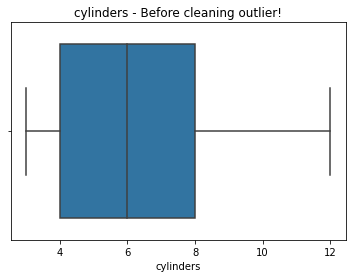

lower_check values : -2.0
upper_check values : 14.0


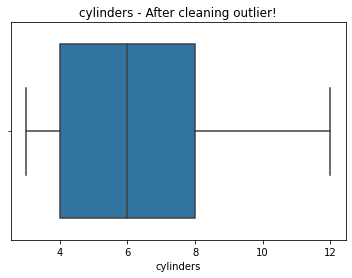


====== [FINISHED] outlier in [cylinders] column has been clear! ====== 



,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,age_car,avg_odometer_year
0,9400.0,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,23,6,2018,8,18125.000000
1,25500.0,2011,ford f-150,2,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,19,10,2018,8,11088.125000
2,5500.0,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,7,2,2019,7,15714.285714
3,1500.0,2003,ford f-150,1,8,gas,181613.0,automatic,pickup,unknown,False,2019-03-22,9,22,3,2019,17,10683.117647
4,14900.0,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2,4,2019,3,26967.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51519,11750.0,2015,honda accord,3,4,gas,104230.0,automatic,coupe,unknown,False,2018-11-24,89,24,11,2018,4,26057.500000
51520,9249.0,2013,nissan maxima,4,6,gas,88136.0,automatic,sedan,black,False,2018-10-03,37,3,10,2018,6,14689.333333
51522,3950.0,2009,hyundai sonata,3,4,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32,15,11,2018,10,12800.000000
51523,7455.0,2013,toyota corolla,2,4,gas,139573.0,automatic,sedan,black,False,2018-07-02,71,2,7,2018,6,23262.166667


In [102]:
outlier_cleansing(dataframe=new_df, column='cylinders')

Findings:

- Pada tabel baru, data silinder mobil tersebar dari 0 sampai 12.
- Mobil yang paling banyak dijual di tabel baru memiliki sedikit perbedaan, perbedaan nya adalah mobil yang memiliki silinder 6 lebih banyak dijual disusul dengan 8 dan 4 yang memiliki nilai yang hampir mirip.
- Sangat jarang mobil yang di jual di website yang memiliki silinder 3, 5, dan 10.
- Mobil yang memiliki silinder 12 hanya ada mungkin beberapa yang dijual di website, sedikit sekali.

Insights:

- Mobil dengan silinder 3, 5, 10 kemungkinan adalah mobil langka dan mungkin mobil ini sulit untuk dijual.

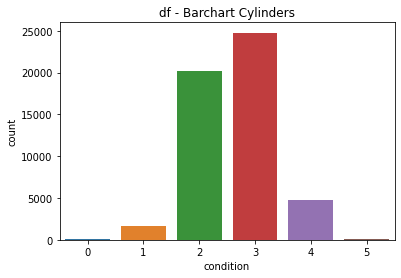

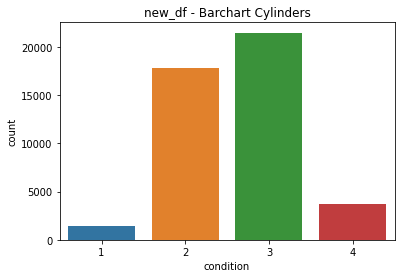

In [103]:
plt.title('df - Barchart Cylinders')
sns.countplot(data=df, x='condition')
plt.show()
plt.title('new_df - Barchart Cylinders')
sns.countplot(data=new_df, x='condition')
plt.show()

lower values : 0.5
upper values : 4.5


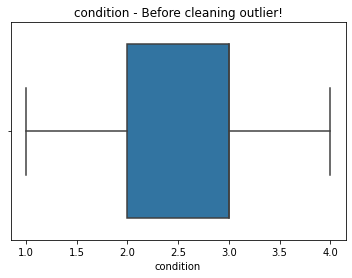

lower_check values : 0.5
upper_check values : 4.5


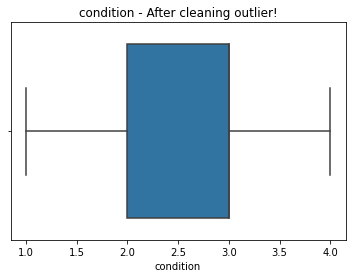


====== [FINISHED] outlier in [condition] column has been clear! ====== 



,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,age_car,avg_odometer_year
0,9400.0,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,23,6,2018,8,18125.000000
1,25500.0,2011,ford f-150,2,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,19,10,2018,8,11088.125000
2,5500.0,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,7,2,2019,7,15714.285714
3,1500.0,2003,ford f-150,1,8,gas,181613.0,automatic,pickup,unknown,False,2019-03-22,9,22,3,2019,17,10683.117647
4,14900.0,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2,4,2019,3,26967.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51519,11750.0,2015,honda accord,3,4,gas,104230.0,automatic,coupe,unknown,False,2018-11-24,89,24,11,2018,4,26057.500000
51520,9249.0,2013,nissan maxima,4,6,gas,88136.0,automatic,sedan,black,False,2018-10-03,37,3,10,2018,6,14689.333333
51522,3950.0,2009,hyundai sonata,3,4,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32,15,11,2018,10,12800.000000
51523,7455.0,2013,toyota corolla,2,4,gas,139573.0,automatic,sedan,black,False,2018-07-02,71,2,7,2018,6,23262.166667


In [104]:
outlier_cleansing(dataframe=new_df, column='condition')

Findings:

- Mobil yang paling banyak dijual di tabel yang baru adalah mobil yang memiliki kondisi excellent dan good.
- Mobil dengan kondisi salvage dan new sangat jarang dijual di website.

Insights:

- Mobil dengan kondisi new sangat jarang dijual diwebsite, mungkin karena mobil dengan kondisi ini kebanyakan dijual di show room mobil yang resmi.

Recommendations:

- Bila ingin menjual mobil dengan cepat, jual mobil di kondisi 2 atau 3 (excellent atau good).

## Masa Berlaku Iklan 
Masa berlaku iklan berada dikolom `days_listed`. Kolom ini yang akan jadi acuan seberapa lama iklan ditayangkan. Mari cari tahu nilai rata-rata dan mediannya agar dapat menyimpulakn seberapa lama iklan umumnya ditayangkan. Selayaknya iklan pada umumnya pasti ada umur iklan yang tergolong cepat dan tergolong lam, mari cari tahu seberapa lama iklan yang tergolong cepat dan iklan yang tergolong lama saat ditayangkan.  


In [105]:
print(df['days_listed'].describe())
print(new_df['days_listed'].describe())


count    51525.00000
mean        39.55476
std         28.20427
min          0.00000
25%         19.00000
50%         33.00000
75%         53.00000
max        271.00000
Name: days_listed, dtype: float64
count    44426.000000
mean        39.550353
std         28.187735
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64


In [106]:
print('Durasi Minimum Listing:', new_df['days_listed'].min())
print('Durasi Median Listing:', new_df['days_listed'].median())
print('Durasi Rata-rata Listing:', new_df['days_listed'].mean())
print('Durasi Maximum Listing:', new_df['days_listed'].max())

Durasi Minimum Listing: 0
Durasi Median Listing: 33.0
Durasi Rata-rata Listing: 39.55035339665962
Durasi Maximum Listing: 271


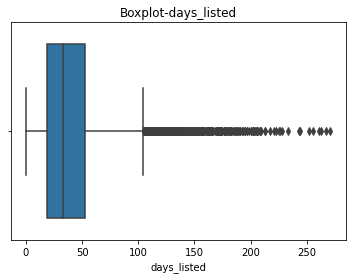

In [107]:
sns.boxplot(data=new_df, x='days_listed')
plt.title('Boxplot-days_listed')
plt.show()


**Kesimpulan**

Ada beberapa kesimpulan yang bisa diambil dari data yang telah ditampilkan, diantaranya:
1. Durasi rata-rata iklan yang ditanyangkan pada website berkisar 39-40 hari.
2. Durasi minimum iklan yang ditanyangkan adalah 0 hari, artinya ada beberapa iklan yang ditanyangkan pada hari itu juga iklan itu dihapus atau dengan kata lain mobil yang di iklankan sudah laku terjual pada hari yang sama saat iklan ditanyangkan.
3. Durasi maximum iklan adalah 271 hari atau sekitar 9 bulan.
4. 50% data iklan ditanyangkan pada website yaitu 33 hari.
5. Durasi iklan yang tergolong cepat adalah 0 hari dan durasi iklan yang tergolong lama adalah iklan yang ditayangkan lebih dari 50 hari.

## Harga Rata-Rata Setiap Jenis Kendaraan

Mari buat tabel yang berisi nilai dari jumlah iklan dan nilai dari harga rata-rata dari setiap jenis kendaraan. Dari berbagai jenis kendaraan tersebut, mari ambil sampel 2 jenis kendaraan dengan jumlah iklan yang paling banyak.

In [108]:
agg_group1 = new_df.groupby(['type']).agg({
    'price': 'mean',
    'type': 'count'
}).rename(columns={
    'price': 'mean_price',
    'type': 'count_type'
}).sort_values(by='count_type', ascending=False)
agg_group1

,mean_price,count_type
type,,
sedan,6694.322086,11143
SUV,9836.046428,11114
truck,13964.204664,9948
pickup,13644.756401,5624
coupe,13045.739777,1883
wagon,8704.875857,1458
mini-van,7521.669492,1062
hatchback,6613.768421,950
van,7984.191729,532


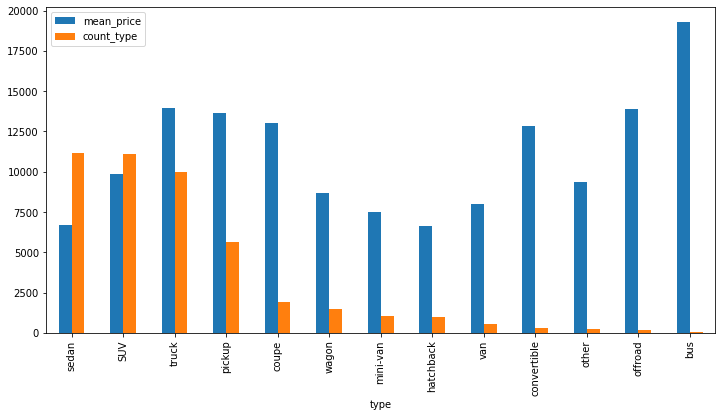

In [109]:
agg_group1.plot(kind='bar', figsize=(12, 6))
plt.show()

**Kesimpulan**

Dari langkah sebelumnya, didapat 2 jenis kendaraan dengan jumlah iklan yang paling banyak. Kendaraan tersebut adalah kendaraan dengan tipe **sedan** yang memiliki jumlah iklan yaitu 11143 iklan dan jumlah rata rata dari harga mobil jenis ini adalah sekitar 6690 sedangakan untuk jenis kendaran **SUV** memiliki jumlah iklan yaitu 11114 iklan dan jumlah rata rata dari harga mobil jenis ini adalah sekitar 9860. 

Dengan didapatnya 2 jenis kendaraan ini, analisis dapat dilakukan dengan 2 jenis kendaraan sebagai sampel untuk analisis. Mari masukan 2 jenis kendaraan ini ke dalam variabel baru yang dibderi nama top2. 

In [110]:
lower_whisker, upper_whisker = up_low_whisker(df['price'])

In [111]:
top2 = new_df.loc[new_df['type'].isin(['sedan', 'SUV']) & (new_df['price'] <= upper_whisker)]
top2.sample(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,age_car,avg_odometer_year
12224,18600.0,2017,honda cr-v,4,4,gas,46800.0,automatic,SUV,unknown,False,2018-08-18,32,18,8,2018,2,23400.000000
32370,6800.0,2012,chevrolet malibu,3,4,gas,68163.0,automatic,sedan,grey,False,2018-11-03,46,3,11,2018,7,9737.571429
31082,2495.0,2008,chevrolet malibu,2,4,gas,129000.0,automatic,sedan,unknown,False,2019-02-24,28,24,2,2019,12,10750.000000
13115,6500.0,2012,hyundai sonata,2,4,gas,121213.0,automatic,sedan,blue,False,2019-01-31,37,31,1,2019,8,15151.625000
15567,5000.0,2009,ford explorer,3,6,gas,104230.0,automatic,SUV,unknown,True,2018-05-26,32,26,5,2018,10,10423.000000


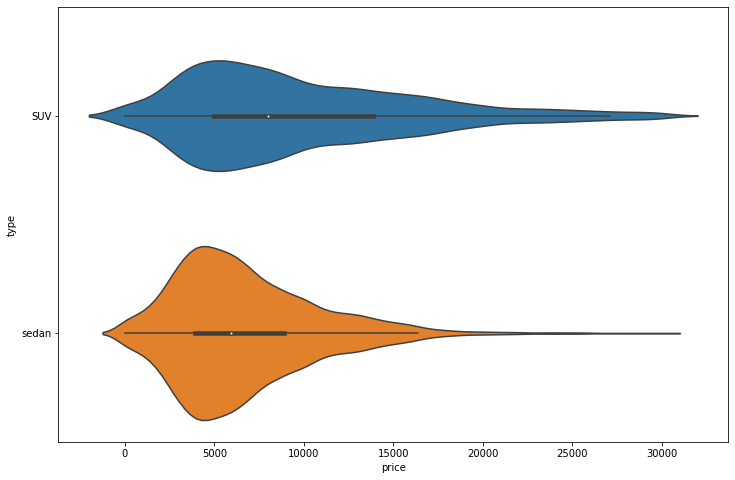

In [112]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=top2, x='price', y='type', figsize=(12, 6))
plt.show()


Dari grafik yang ditampilkan diatas, terlihat bahwa kendaraan jenis **sedan** memiliki bentuk grafik yang lebih gemuk dibandingkan dengan jenis kendaraan **SUV**, ini menandakan bahwa kendaraan jenis **sedan** meliki jumlah iklan yang lebih banyak. Namun dari grafik juga terlihat jenis **SUV** unggul dari segi harga dengan keterpusatan data harga berada di kisaran 5000 - 15000 sedangkan **sedan** keterpusatan data harganya di kisaran 4000 - 9000.

## Faktor Harga

Apakah faktor yang paling memengaruhi harga kendaraan? 

Untuk menjawab pertanyaan diatas, mari pelajari lebih dalam tentang kolom usia, jarak tempuh, kondisi, tipe transmisi, dan warnanya. Pelajari apakah harganya bergantung pada kolom-kolom tersebut. Mari buat grafik boxplot untuk variabel kategorik (jenis transmisi dan warna), lalu buat scatterplot untuk sisanya. Ketika menganalisis variabel kategorik, ingatlah bahwa kategori harus memiliki setidaknya 50 iklan. Jika tidak, parameternya tidak akan valid untuk digunakan saat analisis.

Dari tahap sebelumnya, mari ambil 5 jenis kendaraan dengan jumlah iklan terbanyak sebagai sampel untuk mencari faktor harga dari setiap kendaraan.

In [113]:
top5 = new_df.loc[new_df['type'].isin(['sedan', 'SUV', 'truck', 'pickup', 'coupe']) & (new_df['price'] <= upper_whisker)]
top5.sample(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,age_car,avg_odometer_year
13295,5000.0,2003,chevrolet silverado,2,8,gas,190000.0,automatic,pickup,green,True,2018-12-30,55,30,12,2018,16,11875.000000
27294,12900.0,2015,honda civic,4,4,gas,54000.0,automatic,sedan,black,False,2019-02-13,35,13,2,2019,5,10800.000000
20036,20500.0,2017,ram 1500,3,8,gas,55405.0,automatic,truck,grey,True,2018-05-20,17,20,5,2018,2,27702.500000
10845,5500.0,2011,hyundai sonata,2,4,gas,129000.0,automatic,sedan,blue,False,2018-10-16,17,16,10,2018,8,16125.000000
11840,85.0,2007,toyota corolla,2,4,gas,110850.0,automatic,sedan,silver,False,2018-11-20,48,20,11,2018,12,9237.500000
32616,5295.0,2013,ford focus se,2,4,gas,99385.0,automatic,sedan,grey,False,2018-06-01,9,1,6,2018,6,16564.166667
12257,12500.0,2016,honda accord,4,4,gas,72982.5,automatic,sedan,silver,False,2018-07-19,34,19,7,2018,3,24327.500000
36010,18800.0,2011,cadillac escalade,2,8,gas,102255.0,automatic,SUV,black,False,2019-01-07,19,7,1,2019,9,11361.666667
10142,26700.0,2015,ford f150 supercrew cab xlt,2,6,gas,129000.0,other,pickup,brown,True,2019-03-21,48,21,3,2019,5,25800.000000
38857,6995.0,2016,ford focus,2,4,gas,50000.0,automatic,sedan,blue,False,2019-02-20,9,20,2,2019,4,12500.000000


5 Jenis kendaraan dengan iklan terbanyak sudah didapat, langkah selanjutnya adalah pelajar faktor apa saja yang mempengaruhi harga dari setiap kendaraan. Untuk tahap ini mari pelajari corelasi yang terjadi antara harga dengan kolom kolom numerikal lainnya terlebih dahulu.

In [114]:
num_corr = top5[['price', 'model_year', 'odometer', 'days_listed', 'age_car', 'avg_odometer_year', 'condition']]
num_corr.corr()

,price,model_year,odometer,days_listed,age_car,avg_odometer_year,condition
price,1.000000,0.496769,-0.400823,-0.004908,-0.494937,0.131660,0.185093
model_year,0.496769,1.000000,-0.579999,-0.002868,-0.995381,0.437662,0.280978
odometer,-0.400823,-0.579999,1.000000,0.003154,0.578928,0.357127,-0.309082
days_listed,-0.004908,-0.002868,0.003154,1.000000,0.004010,-0.001703,0.001811
age_car,-0.494937,-0.995381,0.578928,0.004010,1.000000,-0.445922,-0.280312
avg_odometer_year,0.131660,0.437662,0.357127,-0.001703,-0.445922,1.000000,-0.017497
condition,0.185093,0.280978,-0.309082,0.001811,-0.280312,-0.017497,1.000000


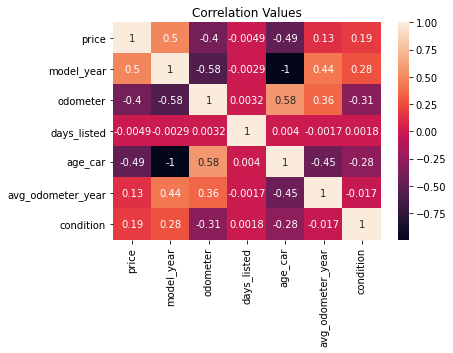

In [115]:
plt.title('Correlation Values')
sns.heatmap(num_corr.corr(), annot=True)
plt.show()

Dari tabel correlation values diatas terlihat bahwa ada beberapa parameter yang memiliki korelasi dengan harga sebuah kendaraan. Contoh: `model_year` terhadap `price`, nilai korelasinya adalah 0,5 artinya semakin bertambah model year nya atau semakin baru model pembuatan mobilnya semakin tinggi harganya, namun hubunganya adalah menengah positif (medium). Contoh lain `age_car` terhadap `price`, nilai korelasinya adalah -0.49 artinya semakin bertambah umur kendaraan maka semakin rendah harga dari kendaraan tersebut dengan korelasinya adalah menengah negatif (medium).

Untuk memperjelas korelasinya, mari buat scatter plot terhadap kolom usia kendaraan, jarak tempuh dan kondisi kendaraan.

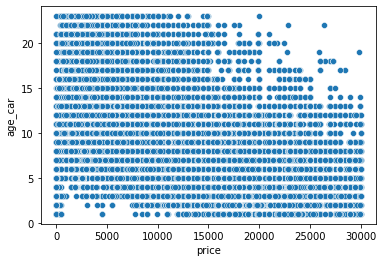

In [116]:
sns.scatterplot(data=top5, x='price', y='age_car')
plt.show()

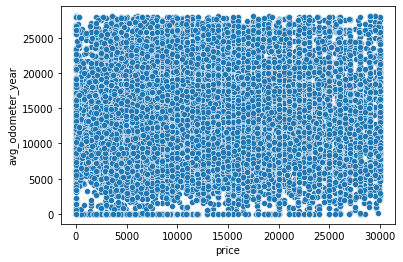

In [117]:
sns.scatterplot(data=top5, x='price', y='avg_odometer_year')
plt.show()

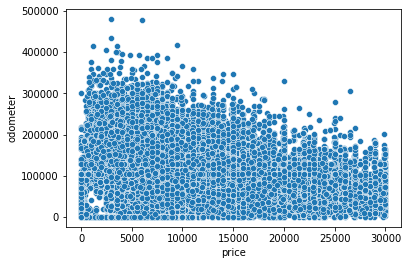

In [118]:
sns.scatterplot(data=top5, x='price', y='odometer')
plt.show()

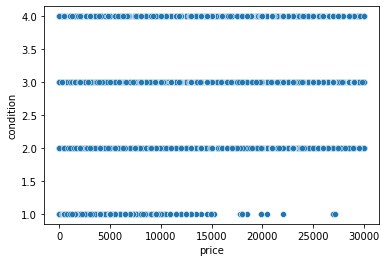

In [119]:
sns.scatterplot(data=top5, x='price', y='condition')
plt.show()

Dari scatter plot yang ditampilkan, terlihat bahwa titik titik nya hampir tersebar merata, hanya ada beberapa titik yang menampilkan area kosong karena mungkin terdapat kasus tertentu. Contohnya seperti pada scatterplot umur kendaraan terhadap harga, umur kendaraan yang lebih dari 15 tahun terlihat lebih kosong area nya. Sama seperti asumsi pertama bahwa semakin tinggi umur kendaraan, semakin rendah harga kendaraan tersebut dan jarang orang yang menjual mobil yang memiliki umur kendaraan lebih dari 15 tahun. Selanjutnya mari buat boxplot untuk kolom kategorik lainnya. 

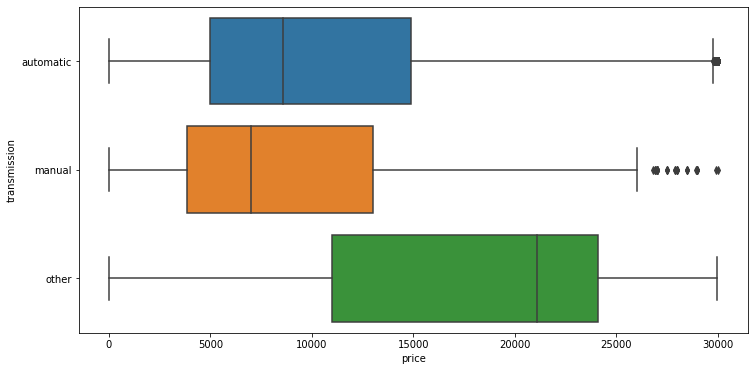

In [120]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=top5, x='price', y='transmission')
plt.show()

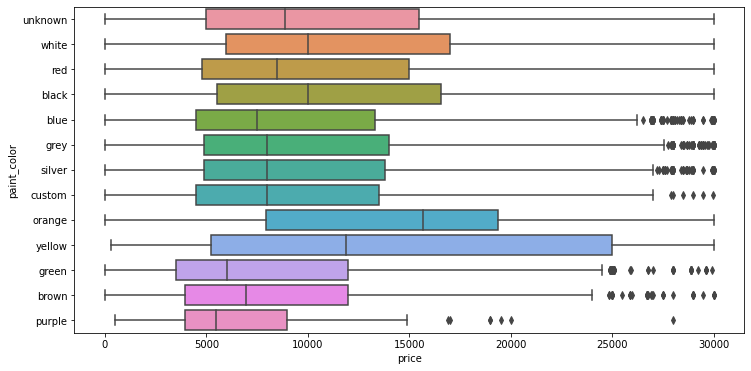

In [121]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=top5, x='price', y='paint_color')
plt.show()

## Kesimpulan Data Eksploratif

Dari ketiga parameter diatas yaitu kolom `age_car`, `odometer` dan `condition` terlihat pada scatterplot dan tabel correlation values yang ditampilkan. Untuk Kolom `age_car` dan `odometer`, kolom ini memiliki korelasi terhadap harga sebuah kendaraan (`price`), namun korelasinya tergolong medium negatif. Dapat diartikan bahwa mungkin semakin tinggi umur kendaraan dan jarak tempuh dari kendaraan, maka semakin rendah harga dari kendaraan tersebut. untuk kolom `condition`, kolom ini memiliki korelasi terhadap harge sebuah kendaraan, namun korelasinya tergolong lemah positif, atau dapat diartikan bahwa kondisi kendaraan tidak menjamin naik turunya harga dari suatu kendaraan tersebut.

Tabel boxplot pertama menampilkan transmisi kendaraan yang manual memiliki rentang harga yang paling rendah dengan range sekitar 4000 - 14000, lalu diatasnya ada transmisi kendaraan yang automatic dengan range harga sekitar 5000 - 15000. Untuk yang paling tinggi adalah transmisi yang digolongkan di golongan other dengan range sekitar 11000 - 24000.

Untuk boxplot kedua menampilkan nilai yang paling besar range harganya adalah kendaraan dengan warna yelow yang memiliki range harga sekitar 5000 - 25000. Untuk nilai yang paling rendah range harganya adalah kendaraan dengan warna purple yang memiliki range harga sekitar 4000 - 9000.   

# Tahap - 5. Kesimpulan Umum


Kesimpulan dari explorasi dan pra-pemprosesan data adalah sebagai berikut:
1. Terdapat missing value di 5 kolom yang berbeda, yaitu: `model_year`, `cylinders`, `odometer`, `paint_color` dan `is_4wd`. 
2. Ada beberapa tipe data yang belum sesuai, tipe data tersebut dirubah ke format sebagai berikut:
   - `date_posted` dirubah mejadi datetime
   - `days_listed`, `model_year`, dan `cylinders` dirubah menjadi int
   - `is_4wd` dirubah menjadi boolean
   - `price` dan `odometer` dirubah menjadi float 
   - `model`, `condition`, `fuel`, `transmission`, `type` dan `paint_color` tidak berubah tetap string.
3. Pada kolom `is_4wd`, missing value diisi dengan 0 karena kolom ini berisi nilai boolean. Pada kolom `paint_color`, missing value diisi dengan 'unknown'. Pada kolom `odometer`, missing value diisi dengan nilai median dari `odometer` terhadap kolom `condition`. Pada kolom `cylinders`, missing value diisi dengan nilai median dari `cylinders` terhadap kolom `model`. Pada kolom `model_year`, missing value diisi dengan nilai median dari `model_year` terhadap kolom `model`.
4. Menambahkan kolom `day_posted`,`month_posted`, `year_posted`, `age_car`, `avg_odometer_year` untuk mempermudah analisis serta merubah kolom `condition` dari string menjadi numerikal.

Kesimpulan dari analisis yang telah dilakukan adalah sebagai berikut:
1. Dataset inti yang diamati lebih lanjut untuk mengatasi niali outlier adalah kolom `price`, `avg_odometer_year`, `age_car`.
2. Dari segi  harga:
   Jarang orang menjual kendaraan dengan harga yang mahal karena harga mobil diatas 30000 adalah harga yang jarang dijual. Harga mobil yang dijual kebanyakan dijual dengan harga 10000. Jika ingin menjual mobil dengan cepat maka jual lah mobil di bawah harga rata-rata yaitu 10000.
3. Dari segi jarak tempuh rata-rata per tahun:
   Mobil yang dijual dengan jarak tempuh lebih dari 28 ribu tergolong jarang dan mobil yang dijual kebanyakan memiliki jarak tempuh sekitar 13 ribu. Jika ingin menjual mobil dengan cepat jual lah mobil dengan jarak tempuh di bawah jarak tempuh rata-ratanya.
4. Dari segi umur kendaraan:
   Mobil yang memiliki umur diatas 23 tahun tergolong jarang dan mobil yang dijual kebanyakan berumur 9 tahun. Dari segi umur kendaraan ini dapat ditarik kesimpulan bahwa semakin tinggi umur mobil maka semakin susah pula untuk menjualnya. Bila ingin cepat mejual mobil, jual mobil dengan kisaran umur dibawah 9 tahun.
5. Dari segi masa berlaku iklan:
   Durasi rata-rata iklan yang ditanyangkan pada website berkisar 39-40 hari dan durasi minimum nya adalah 0 hari, artinya ada beberapa iklan yang ditanyangkan pada hari itu juga iklan itu dihapus atau dengan kata lain mobil yang di iklankan sudah laku terjual pada hari yang sama saat iklan ditanyangkan.
   Untuk durasi maximum iklan pada website adalah 271 hari atau sekitar 9 bulan  sedangkan 50% data iklan yang ditanyangkan pada website yaitu 33 hari. Dapat ditarik kesimpulan, durasi iklan yang tergolong cepat adalah 0 hari dan durasi iklan yang tergolong lama adalah iklan yang ditayangkan lebih dari 50 hari.
6. Jenis kendaraan terbanyak:
   Ada 2 jenis kendaraan yang memiliki jumlah iklan terbanyak, kendaraan tersebut adalah sedan dan SUV. Kendaraan dengan tipe sedan yang memiliki jumlah iklan yaitu 11143 iklan dan jumlah rata rata dari harga mobil jenis ini adalah sekitar 6690 sedangakan jenis kendaran SUV memiliki jumlah iklan yaitu 11114 iklan dan jumlah rata rata dari harga mobil jenis ini adalah sekitar 9860. 
7. Faktor yang mempengaruhi harag dan korelasinya: 
   Untuk umur kendaraan dan jarak tempuh kendaraan memiliki korelasi terhadap harga sebuah kendaraan, namun korelasinya tergolong medium negatif. Dapat diartikan bahwa mungkin semakin tinggi umur kendaraan dan jarak tempuh dari kendaraan, maka semakin rendah harga dari kendaraan tersebut. Untuk kondisi kendaraan memiliki korelasi terhadap harga sebuah kendaraan, namun korelasinya tergolong lemah positif, atau dapat diartikan bahwa kondisi kendaraan tidak menjamin naik turunya harga dari suatu kendaraan tersebut.